In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pymysql
warnings.filterwarnings('ignore')

## Работа с данными по аспирантам

In [4]:
df_asp = pd.read_csv(r'C:\Users\makar\office_staff\asp_4course.csv')
df_asp.head(5)

,Unnamed: 0,tabel_number,division,specialization,course,state,citizenship,date_of_birth,start_date,end_date,discipline,mark,semester,academic_year,structural_division
0,0,2200674,Горный институт,Электротехнические комплексы и системы,3,Аспирант,Ирак,11.05.1981,01.09.2024,31.08.2026,NaN,NaN,NaN,NaN,NaN
1,1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Cвойства наносистем,зачтено,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
2,2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Иностранный язык,Хорошо,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
3,3,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,История и философия науки,Отлично,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
4,4,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Научно-исследовательская деятельность и подгот...,Отлично,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий


In [5]:
df_asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1582 non-null   int64 
 1   tabel_number         1582 non-null   int64 
 2   division             1582 non-null   object
 3   specialization       1582 non-null   object
 4   course               1582 non-null   int64 
 5   state                1582 non-null   object
 6   citizenship          1582 non-null   object
 7   date_of_birth        1582 non-null   object
 8   start_date           1085 non-null   object
 9   end_date             1085 non-null   object
 10  discipline           951 non-null    object
 11  mark                 937 non-null    object
 12  semester             951 non-null    object
 13  academic_year        951 non-null    object
 14  structural_division  969 non-null    object
dtypes: int64(3), object(12)
memory usage: 185.5+ KB


In [6]:
count_st = df_asp['tabel_number'].count()
unique_students = df_asp['tabel_number'].nunique()
print(f"Всего {count_st} записи по аспирантам")
print(f"Из них уникальных студентов: {unique_students}")

Всего 1582 записи по аспирантам
Из них уникальных студентов: 767


Смотрим, сколько уникальных студентов на каждом из курсов

In [7]:
unique_counts = df_asp.groupby('course')['tabel_number'].nunique().to_dict()

unique_counts_by_course = {
    "Курс": [1, 2, 3, 4],
    "Число уникальных студентов": [unique_counts.get(i, 0) for i in range(1, 5)]
}
unique_counts_df = pd.DataFrame(unique_counts_by_course)
print(unique_counts_df)

   Курс  Число уникальных студентов
0     1                         248
1     2                         213
2     3                         169
3     4                         137


### Данные по студентам первого курса

In [8]:
filtered_1_course = df_asp[df_asp['course'] == 1]
filtered_1_course.head(5)

,Unnamed: 0,tabel_number,division,specialization,course,state,citizenship,date_of_birth,start_date,end_date,discipline,mark,semester,academic_year,structural_division
10,10,2416101,Институт информационных технологий и компьютер...,"Системный анализ, управление и обработка инфор...",1,Аспирант,Ирак,15.07.1982,01.07.2022,31.07.2022,NaN,NaN,NaN,NaN,НИТУ МИСИС
11,11,2403405,Институт новых материалов и нанотехнологий,Физика конденсированного состояния,1,Аспирант,Российская Федерация,22.05.1989,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС
12,12,2400123,Горный институт,Горнопромышленная и нефтегазопромысловая геоло...,1,Аспирант,Российская Федерация,10.11.2000,01.09.2024,31.08.2028,NaN,NaN,NaN,NaN,НИТУ МИСИС
13,13,2412003,Институт биомедицинской инженерии,Материаловедение,1,Аспирант,Российская Федерация,31.12.2000,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС
14,14,2401186,Институт новых материалов и нанотехнологий,Материаловедение,1,Аспирант,Нигерия,02.02.1992,01.09.2024,30.06.2028,NaN,NaN,NaN,NaN,НИТУ МИСИС


In [9]:
filtered_1_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 10 to 1578
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           248 non-null    int64 
 1   tabel_number         248 non-null    int64 
 2   division             248 non-null    object
 3   specialization       248 non-null    object
 4   course               248 non-null    int64 
 5   state                248 non-null    object
 6   citizenship          248 non-null    object
 7   date_of_birth        248 non-null    object
 8   start_date           130 non-null    object
 9   end_date             130 non-null    object
 10  discipline           0 non-null      object
 11  mark                 0 non-null      object
 12  semester             0 non-null      object
 13  academic_year        0 non-null      object
 14  structural_division  248 non-null    object
dtypes: int64(3), object(12)
memory usage: 31.0+ KB


Составляем список из уникальных номеров личного дела (tabel_number) студентов 1 курса

In [10]:
tabel_numbers = filtered_1_course['tabel_number'].unique().tolist()

### Импорт таблицы посещаемости студентов 1 курса

In [11]:
event_course1 = pd.read_csv(r'C:\Users\makar\office_staff\asp_events_for_course1.csv')
event_course1

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number
0,45478102,2024-02-05 11:09:00,131072,1182111.0,12.0,2.0,65606.0,1660589.0,5136863,5325008.0,1.0,171451.0,NaN,2024-02-05 11:09:00,NaN,NaN,2024-02-05 08:09:00,NaN,2402278
1,45478107,2024-02-05 11:09:00,17,1182111.0,0.0,2.0,0.0,1660589.0,5136863,NaN,1.0,171451.0,NaN,2024-02-05 11:09:01,NaN,NaN,2024-02-05 08:09:00,1.0,2402278
2,45480467,2024-02-05 11:26:11,131072,2153041.0,12.0,1.0,65603.0,1660589.0,5136863,5325007.0,1.0,2155773.0,NaN,2024-02-05 11:26:11,NaN,NaN,2024-02-05 08:26:11,NaN,2402278
3,45480472,2024-02-05 11:26:11,17,2153041.0,0.0,1.0,0.0,1660589.0,5136863,NaN,1.0,2155773.0,NaN,2024-02-05 11:26:13,NaN,NaN,2024-02-05 08:26:11,1.0,2402278
4,45482238,2024-02-05 11:40:51,131072,2145761.0,12.0,1.0,65609.0,1660589.0,5136863,5325007.0,2155773.0,1.0,NaN,2024-02-05 11:40:51,NaN,NaN,2024-02-05 08:40:51,NaN,2402278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31746,87866171,2024-11-09 10:31:05,17,2265766.0,0.0,2.0,0.0,8206746.0,5402337,NaN,2272132.0,1.0,NaN,2024-11-09 10:31:07,NaN,NaN,2024-11-09 07:31:05,1.0,2412109
31747,87866946,2024-11-09 10:40:48,131072,2269403.0,12.0,1.0,65617.0,8206746.0,5402337,5325009.0,2272132.0,1.0,NaN,2024-11-09 10:40:49,NaN,NaN,2024-11-09 07:40:48,NaN,2412109
31748,87866949,2024-11-09 10:40:48,17,2269403.0,0.0,1.0,0.0,8206746.0,5402337,NaN,2272132.0,1.0,NaN,2024-11-09 10:40:49,NaN,NaN,2024-11-09 07:40:48,1.0,2412109
31749,87872131,2024-11-09 12:27:09,131072,2265766.0,12.0,2.0,65620.0,8206746.0,5402337,5325009.0,2272132.0,1.0,NaN,2024-11-09 12:27:09,NaN,NaN,2024-11-09 09:27:09,NaN,2412109


Видим, что всего 31751 записей по аспирантам 1 курса

In [12]:
# Добавляем столбец с датой
event_course1['time_label'] = pd.to_datetime(event_course1['time_label'])
event_course1['date'] = event_course1['time_label'].dt.date

event_course1.head(5)

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date
0,45478102,2024-02-05 11:09:00,131072,1182111.0,12.0,2.0,65606.0,1660589.0,5136863,5325008.0,1.0,171451.0,NaN,2024-02-05 11:09:00,NaN,NaN,2024-02-05 08:09:00,NaN,2402278,2024-02-05
1,45478107,2024-02-05 11:09:00,17,1182111.0,0.0,2.0,0.0,1660589.0,5136863,NaN,1.0,171451.0,NaN,2024-02-05 11:09:01,NaN,NaN,2024-02-05 08:09:00,1.0,2402278,2024-02-05
2,45480467,2024-02-05 11:26:11,131072,2153041.0,12.0,1.0,65603.0,1660589.0,5136863,5325007.0,1.0,2155773.0,NaN,2024-02-05 11:26:11,NaN,NaN,2024-02-05 08:26:11,NaN,2402278,2024-02-05
3,45480472,2024-02-05 11:26:11,17,2153041.0,0.0,1.0,0.0,1660589.0,5136863,NaN,1.0,2155773.0,NaN,2024-02-05 11:26:13,NaN,NaN,2024-02-05 08:26:11,1.0,2402278,2024-02-05
4,45482238,2024-02-05 11:40:51,131072,2145761.0,12.0,1.0,65609.0,1660589.0,5136863,5325007.0,2155773.0,1.0,NaN,2024-02-05 11:40:51,NaN,NaN,2024-02-05 08:40:51,NaN,2402278,2024-02-05


Теперь найдем уникальные типы событий 

In [13]:
unique_events = event_course1.groupby(['event_type']).size().reset_index(name='count')
unique_events

,event_type,count
0,1,106
1,2,11
2,4,99
3,15,1
4,16,520
5,17,15438
6,31,436
7,131072,13472
8,131328,32
9,131584,11


Нам нужны записи с event_type == 16, 17

In [14]:
event_course1 = event_course1[event_course1['event_type'].isin([16, 17])]
event_course1

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date
1,45478107,2024-02-05 11:09:00,17,1182111.0,0.0,2.0,0.0,1660589.0,5136863,NaN,1.0,171451.0,NaN,2024-02-05 11:09:01,NaN,NaN,2024-02-05 08:09:00,1.0,2402278,2024-02-05
3,45480472,2024-02-05 11:26:11,17,2153041.0,0.0,1.0,0.0,1660589.0,5136863,NaN,1.0,2155773.0,NaN,2024-02-05 11:26:13,NaN,NaN,2024-02-05 08:26:11,1.0,2402278,2024-02-05
5,45482244,2024-02-05 11:40:52,17,2145761.0,0.0,1.0,0.0,1660589.0,5136863,NaN,2155773.0,1.0,NaN,2024-02-05 11:40:53,NaN,NaN,2024-02-05 08:40:52,1.0,2402278,2024-02-05
7,45483490,2024-02-05 11:50:08,17,4034688.0,0.0,1.0,0.0,1660589.0,5136863,NaN,1.0,1808617.0,NaN,2024-02-05 11:50:09,NaN,NaN,2024-02-05 08:50:08,1.0,2402278,2024-02-05
9,45777691,2024-02-07 12:57:43,17,2149401.0,0.0,2.0,0.0,1660589.0,5136863,NaN,1.0,2155773.0,NaN,2024-02-07 12:57:44,NaN,NaN,2024-02-07 09:57:43,1.0,2402278,2024-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31742,86455779,2024-10-26 13:20:30,17,1820464.0,0.0,1.0,0.0,8206746.0,5402337,NaN,1.0,1808617.0,NaN,2024-10-26 13:20:32,NaN,NaN,2024-10-26 10:20:30,1.0,2412109,2024-10-26
31744,87862433,2024-11-09 08:49:32,17,2265766.0,0.0,1.0,0.0,8206746.0,5402337,NaN,2272132.0,1.0,NaN,2024-11-09 08:49:33,NaN,NaN,2024-11-09 05:49:32,1.0,2412109,2024-11-09
31746,87866171,2024-11-09 10:31:05,17,2265766.0,0.0,2.0,0.0,8206746.0,5402337,NaN,2272132.0,1.0,NaN,2024-11-09 10:31:07,NaN,NaN,2024-11-09 07:31:05,1.0,2412109,2024-11-09
31748,87866949,2024-11-09 10:40:48,17,2269403.0,0.0,1.0,0.0,8206746.0,5402337,NaN,2272132.0,1.0,NaN,2024-11-09 10:40:49,NaN,NaN,2024-11-09 07:40:48,1.0,2412109,2024-11-09


Видим, что теперь количество записей по студентам 1 курса 15958

Теперь соединяем таблицы с информацией по аспирантам и их посещаемостью. Добавляем столбец с гражданством в таблицу event_course1

In [15]:
# Добавляем столбец 'dormitory', который будет равен 'yes', если есть start_date и end_date
filtered_1_course['dormitory'] = filtered_1_course.apply(
    lambda row: 'Общежитие есть' if pd.notna(row['start_date']) and pd.notna(row['end_date']) else 'Нет общежития', axis=1
)
event_course1 = event_course1.drop(columns=['citizenship', 'citizenship_x', 'citizenship_y'], errors='ignore')
event_course1 = event_course1.merge(filtered_1_course[['tabel_number', 'citizenship', 'dormitory']], 
                                    on='tabel_number', 
                                    how='left')

event_course1

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,...,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date,citizenship,dormitory
0,45478107,2024-02-05 11:09:00,17,1182111.0,0.0,2.0,0.0,1660589.0,5136863,NaN,...,NaN,2024-02-05 11:09:01,NaN,NaN,2024-02-05 08:09:00,1.0,2402278,2024-02-05,Уганда,Общежитие есть
1,45480472,2024-02-05 11:26:11,17,2153041.0,0.0,1.0,0.0,1660589.0,5136863,NaN,...,NaN,2024-02-05 11:26:13,NaN,NaN,2024-02-05 08:26:11,1.0,2402278,2024-02-05,Уганда,Общежитие есть
2,45482244,2024-02-05 11:40:52,17,2145761.0,0.0,1.0,0.0,1660589.0,5136863,NaN,...,NaN,2024-02-05 11:40:53,NaN,NaN,2024-02-05 08:40:52,1.0,2402278,2024-02-05,Уганда,Общежитие есть
3,45483490,2024-02-05 11:50:08,17,4034688.0,0.0,1.0,0.0,1660589.0,5136863,NaN,...,NaN,2024-02-05 11:50:09,NaN,NaN,2024-02-05 08:50:08,1.0,2402278,2024-02-05,Уганда,Общежитие есть
4,45777691,2024-02-07 12:57:43,17,2149401.0,0.0,2.0,0.0,1660589.0,5136863,NaN,...,NaN,2024-02-07 12:57:44,NaN,NaN,2024-02-07 09:57:43,1.0,2402278,2024-02-07,Уганда,Общежитие есть
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15953,86455779,2024-10-26 13:20:30,17,1820464.0,0.0,1.0,0.0,8206746.0,5402337,NaN,...,NaN,2024-10-26 13:20:32,NaN,NaN,2024-10-26 10:20:30,1.0,2412109,2024-10-26,Российская Федерация,Нет общежития
15954,87862433,2024-11-09 08:49:32,17,2265766.0,0.0,1.0,0.0,8206746.0,5402337,NaN,...,NaN,2024-11-09 08:49:33,NaN,NaN,2024-11-09 05:49:32,1.0,2412109,2024-11-09,Российская Федерация,Нет общежития
15955,87866171,2024-11-09 10:31:05,17,2265766.0,0.0,2.0,0.0,8206746.0,5402337,NaN,...,NaN,2024-11-09 10:31:07,NaN,NaN,2024-11-09 07:31:05,1.0,2412109,2024-11-09,Российская Федерация,Нет общежития
15956,87866949,2024-11-09 10:40:48,17,2269403.0,0.0,1.0,0.0,8206746.0,5402337,NaN,...,NaN,2024-11-09 10:40:49,NaN,NaN,2024-11-09 07:40:48,1.0,2412109,2024-11-09,Российская Федерация,Нет общежития


## Определим тех, кто не ходил в ВУЗ

Сначала определим количество отсутствующих студентов за каждый месяц текущего учебного года

In [14]:
event_course1['date'] = pd.to_datetime(event_course1['date'])
months_to_check = {'2024-09': 'сентябрь', '2024-10': 'октябрь', '2024-11': 'ноябрь'}
absent_students_by_month = []

for month in months_to_check.keys():
    events_in_month = event_course1[event_course1['date'].dt.strftime('%Y-%m') == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()

    absent_tabel_numbers = filtered_1_course.loc[~filtered_1_course['tabel_number'].isin(present_tabel_numbers)]

    absent_students_by_month.append({
        'Месяц': month,
        'Количество отсутствующих студентов': absent_tabel_numbers.shape[0]
    })
absent_students_df = pd.DataFrame(absent_students_by_month)
absent_students_df

,Месяц,Количество отсутствующих студентов
0,2024-09,52
1,2024-10,53
2,2024-11,81


Найдем количество уникальных отсутствующих студентов

In [15]:
absent_students_by_month = {}
for month in months_to_check.keys():
    events_in_month = event_course1[event_course1['date'].dt.strftime('%Y-%m') == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = set(filtered_1_course.loc[~filtered_1_course['tabel_number'].isin(present_tabel_numbers), 'tabel_number'])
    absent_students_by_month[month] = absent_tabel_numbers
all_absences = absent_students_by_month['2024-09'] | absent_students_by_month['2024-10'] | absent_students_by_month['2024-11']
unique_absent_count = len(all_absences)

print(f"Уникальное количество отсутствующих студентов: {unique_absent_count} из 248")

Уникальное количество отсутствующих студентов: 89 из 248


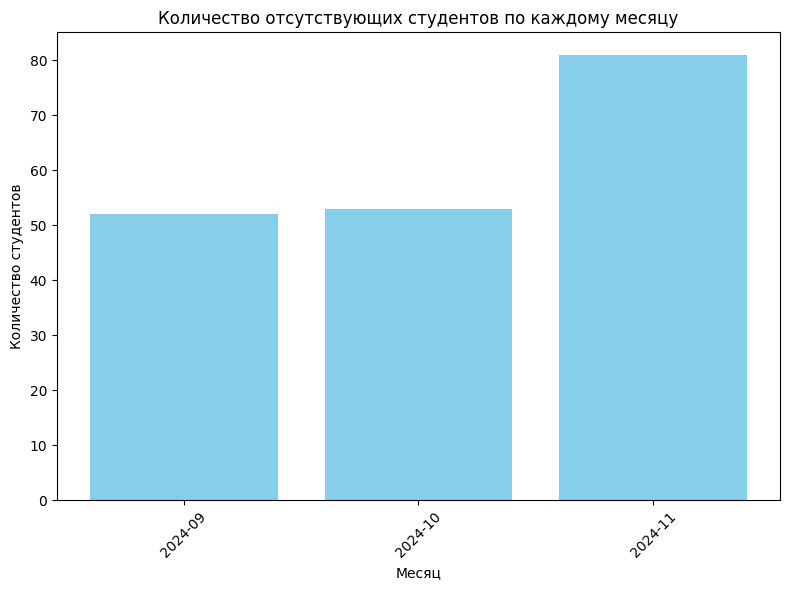

In [16]:
months = {'2024-09', '2024-10', '2024-11'}
plt.figure(figsize=(8, 6)) 
absent_students_filtered = absent_students_df[absent_students_df['Месяц'].isin(months)]
plt.bar(absent_students_filtered['Месяц'], absent_students_filtered['Количество отсутствующих студентов'], color='skyblue')

plt.xlabel('Месяц')
plt.ylabel('Количество студентов')
plt.title('Количество отсутствующих студентов по каждому месяцу')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выведем таблицы с информацией по отсутствующим студентам

In [130]:
absent_students_by_month = {}

for month, month_name in months_to_check.items():
    events_in_month = event_course1[event_course1['date'].dt.strftime('%Y-%m') == month]

    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = filtered_1_course.loc[
        (~filtered_1_course['tabel_number'].isin(present_tabel_numbers)) & 
        (filtered_1_course['citizenship'] != 'Российская Федерация')
    ]
    absent_students_by_month[month_name] = absent_tabel_numbers[['tabel_number', 'citizenship', 'dormitory']]
print("Отсутствующие в сентябре:")
absent_students_by_month['сентябрь']

Отсутствующие в сентябре:


,tabel_number,citizenship,dormitory
10,2416101,Ирак,Общежитие есть
42,2405982,Ирак,Общежитие есть
45,2416113,Ирак,Общежитие есть
55,2407847,Ирак,Общежитие есть
279,2414964,Ангола,Общежитие есть
386,2414474,Ирак,Общежитие есть
985,2415011,Китай,Общежитие есть
1142,2413586,Казахстан,Общежитие есть
1356,2414681,Узбекистан,Общежитие есть
1402,2409877,Ангола,Общежитие есть


Построим диаграмму распределения гражданства среди отсутствующих

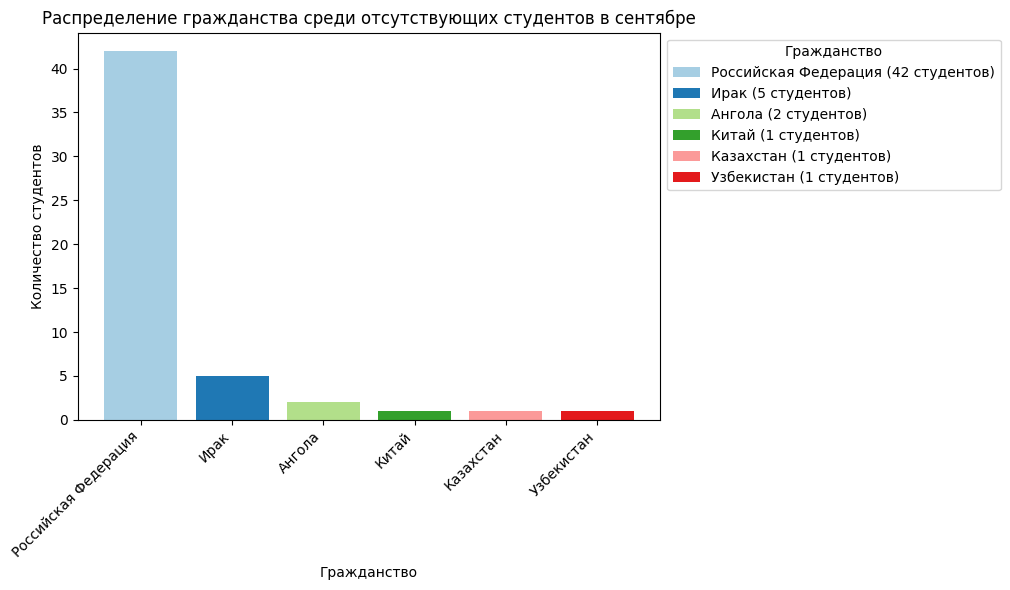

In [18]:
absent_students_september = absent_students_by_month['сентябрь']
citizenship_counts = absent_students_september['citizenship'].value_counts()

plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts.index, citizenship_counts, color=plt.cm.Paired.colors)

plt.title("Распределение гражданства среди отсутствующих студентов в сентябре")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts.index, citizenship_counts)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

Выводим информацию по отсутствующим в октябре

In [132]:
print("Отсутствующие в октябре:")
absent_students_by_month['октябрь']

Отсутствующие в октябре:


,tabel_number,citizenship,dormitory
10,2416101,Ирак,Общежитие есть
42,2405982,Ирак,Общежитие есть
45,2416113,Ирак,Общежитие есть
55,2407847,Ирак,Общежитие есть
279,2414964,Ангола,Общежитие есть
386,2414474,Ирак,Общежитие есть
985,2415011,Китай,Общежитие есть
1155,2401168,Перу,Общежитие есть
1356,2414681,Узбекистан,Общежитие есть
1402,2409877,Ангола,Общежитие есть


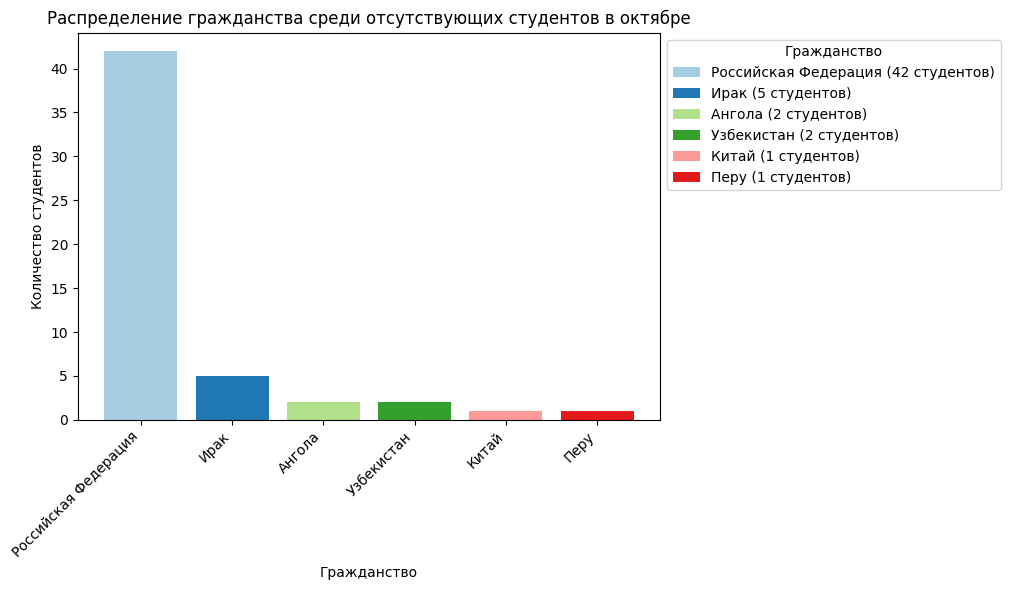

In [20]:
absent_students_october = absent_students_by_month['октябрь']
citizenship_counts_o = absent_students_october['citizenship'].value_counts()

plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts_o.index, citizenship_counts_o, color=plt.cm.Paired.colors)

plt.title("Распределение гражданства среди отсутствующих студентов в октябре")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts_o.index, citizenship_counts_o)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

Выводим информацию по отсутствующим в ноябре

In [133]:
print("Отсутствующие в ноябре:")
absent_students_by_month['ноябрь']

Отсутствующие в ноябре:


,tabel_number,citizenship,dormitory
10,2416101,Ирак,Общежитие есть
30,2402693,Таджикистан,Общежитие есть
42,2405982,Ирак,Общежитие есть
45,2416113,Ирак,Общежитие есть
55,2407847,Ирак,Общежитие есть
279,2414964,Ангола,Общежитие есть
684,2414555,Сьерра-Леоне,Общежитие есть
881,2409413,"Танзания, Объединенная Республика",Общежитие есть
886,2411440,Таджикистан,Общежитие есть
985,2415011,Китай,Общежитие есть


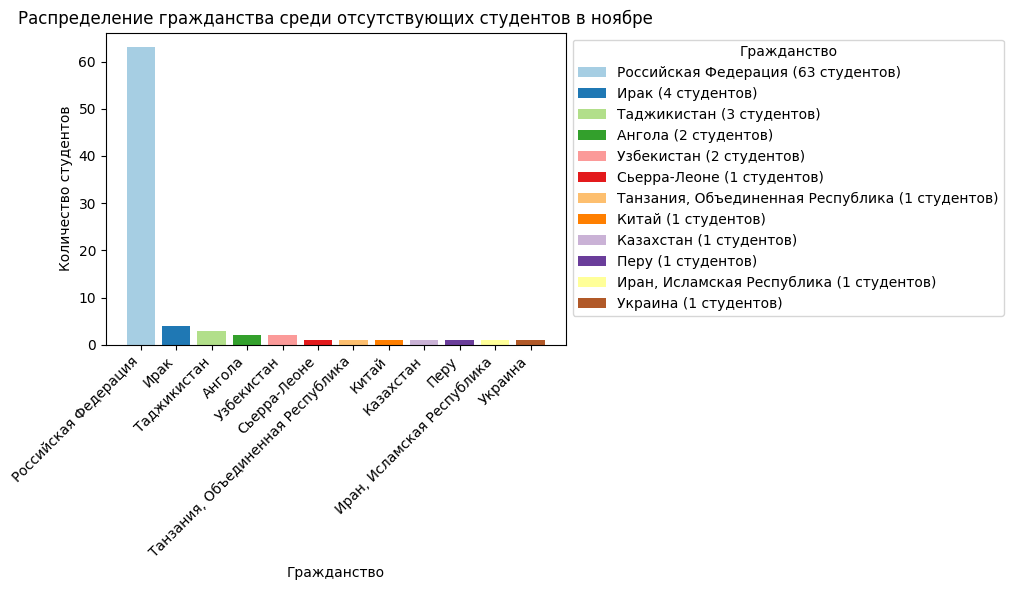

In [22]:
absent_students_november = absent_students_by_month['ноябрь']
citizenship_counts_n = absent_students_november['citizenship'].value_counts()

plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts_n.index, citizenship_counts_n, color=plt.cm.Paired.colors)

plt.title("Распределение гражданства среди отсутствующих студентов в ноябре")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts_n.index, citizenship_counts_n)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

Найдем количество отсутствующих студентов за 1, 2 и 3 месяца

In [23]:
absent_students_by_month = {}
for month in months_to_check.keys():
    events_in_month = event_course1[event_course1['date'].dt.strftime('%Y-%m') == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = set(filtered_1_course.loc[~filtered_1_course['tabel_number'].isin(present_tabel_numbers), 'tabel_number'])
    absent_students_by_month[month] = absent_tabel_numbers
    
only_one_month_absent = (
    (absent_students_by_month['2024-09'] - absent_students_by_month['2024-10'] - absent_students_by_month['2024-11']) |
    (absent_students_by_month['2024-10'] - absent_students_by_month['2024-09'] - absent_students_by_month['2024-11']) |
    (absent_students_by_month['2024-11'] - absent_students_by_month['2024-09'] - absent_students_by_month['2024-10'])
)

only_two_months_absent = (
    (absent_students_by_month['2024-09'] & absent_students_by_month['2024-10'] - absent_students_by_month['2024-11']) |
    (absent_students_by_month['2024-09'] & absent_students_by_month['2024-11'] - absent_students_by_month['2024-10']) |
    (absent_students_by_month['2024-10'] & absent_students_by_month['2024-11'] - absent_students_by_month['2024-09'])
)

all_three_months_absent = absent_students_by_month['2024-09'] & absent_students_by_month['2024-10'] & absent_students_by_month['2024-11']
absence_summary_df = pd.DataFrame({
    "Категория": [
        "Отсутствующие только один месяц",
        "Отсутствующие два месяца",
        "Отсутствующие все три месяца"
    ],
    "Количество студентов": [
        len(only_one_month_absent),
        len(only_two_months_absent),
        len(all_three_months_absent)
    ]
})
absence_summary_df

,Категория,Количество студентов
0,Отсутствующие только один месяц,33
1,Отсутствующие два месяца,15
2,Отсутствующие все три месяца,41


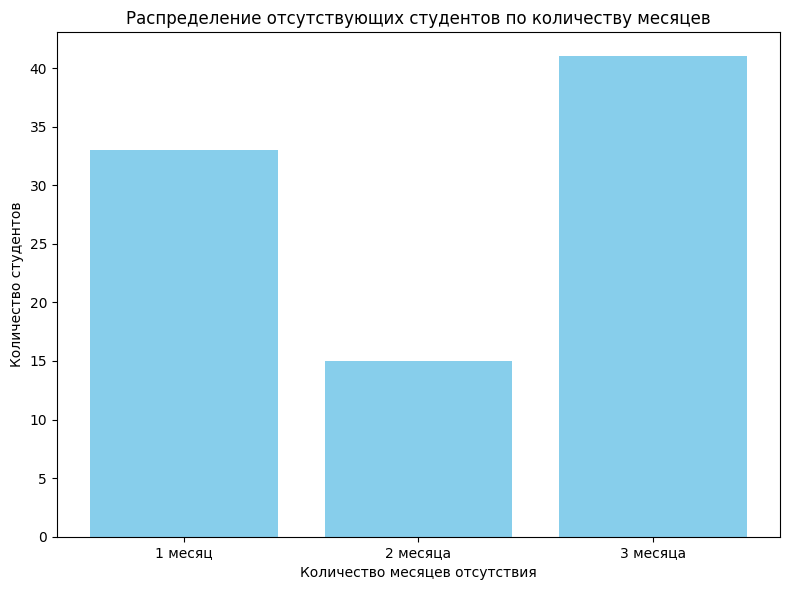

In [24]:
x_labels = ["1 месяц", "2 месяца", "3 месяца"]
plt.figure(figsize=(8, 6))
plt.bar(x_labels, absence_summary_df['Количество студентов'], color='skyblue')

plt.xlabel('Количество месяцев отсутствия')
plt.ylabel('Количество студентов')
plt.title('Распределение отсутствующих студентов по количеству месяцев')

plt.tight_layout()
plt.show()

Таблица уникальных студентов, отсутствующих только один месяц

In [134]:
only_one_month_df = filtered_1_course[
    (filtered_1_course['tabel_number'].isin(only_one_month_absent)) &
    (filtered_1_course['citizenship'] != "Российская Федерация")
][['tabel_number', 'citizenship', 'dormitory']]

print("Студенты, отсутствующие только один месяц (не граждане РФ):")
only_one_month_df

Студенты, отсутствующие только один месяц (не граждане РФ):


,tabel_number,citizenship,dormitory
30,2402693,Таджикистан,Общежитие есть
684,2414555,Сьерра-Леоне,Общежитие есть
881,2409413,"Танзания, Объединенная Республика",Общежитие есть
886,2411440,Таджикистан,Общежитие есть
1199,2415517,"Иран, Исламская Республика",Общежитие есть
1537,2401221,Таджикистан,Общежитие есть
1551,2416172,Украина,Общежитие есть


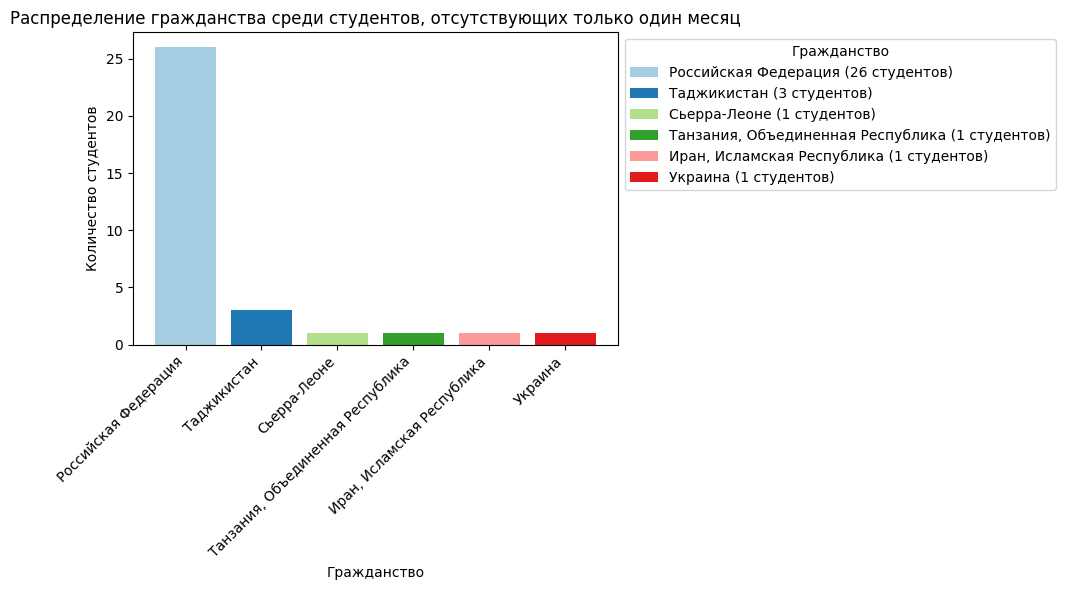

In [26]:
citizenship_counts_one_month = only_one_month_df['citizenship'].value_counts()
plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts_one_month.index, citizenship_counts_one_month, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих только один месяц")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts_one_month.index, citizenship_counts_one_month)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [135]:
only_two_months_df = filtered_1_course[
    (filtered_1_course['tabel_number'].isin(only_two_months_absent)) &
    (filtered_1_course['citizenship'] != "Российская Федерация")
][['tabel_number', 'citizenship', 'dormitory']]

print("\nСтуденты, отсутствующие два месяца (не граждане РФ):")
only_two_months_df


Студенты, отсутствующие два месяца (не граждане РФ):


,tabel_number,citizenship,dormitory
386,2414474,Ирак,Общежитие есть
1142,2413586,Казахстан,Общежитие есть
1155,2401168,Перу,Общежитие есть
1468,2401827,Узбекистан,Общежитие есть


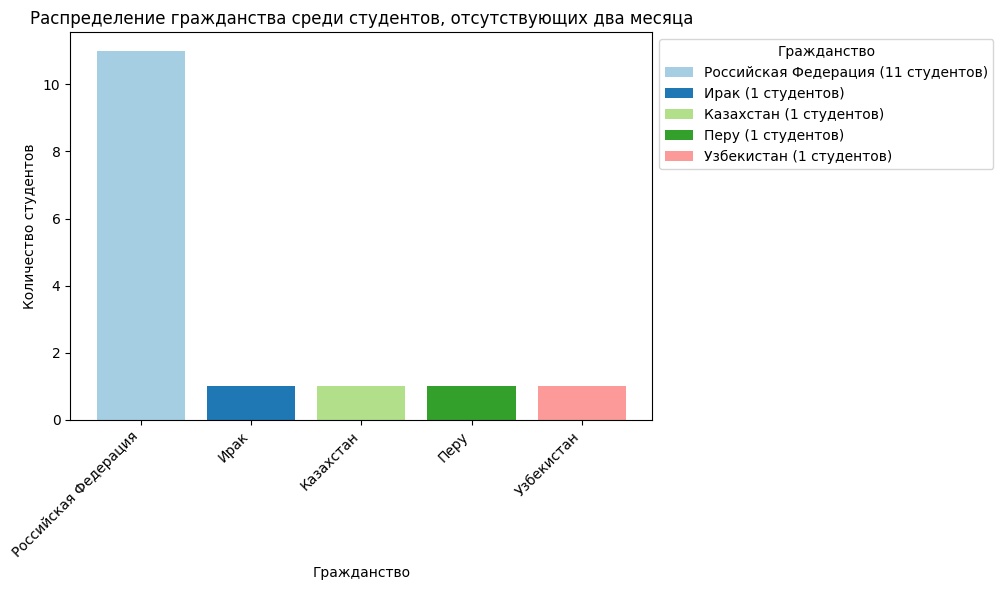

In [28]:
citizenship_counts_two_months = only_two_months_df['citizenship'].value_counts()
plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts_two_months.index, citizenship_counts_two_months, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих два месяца")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts_two_months.index, citizenship_counts_two_months)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [136]:
all_three_months_df = filtered_1_course[
    (filtered_1_course['tabel_number'].isin(all_three_months_absent)) &
    (filtered_1_course['citizenship'] != "Российская Федерация")
][['tabel_number', 'citizenship', 'dormitory']]

print("\nСтуденты, отсутствующие все три месяца (не граждане РФ):")
all_three_months_df


Студенты, отсутствующие все три месяца (не граждане РФ):


,tabel_number,citizenship,dormitory
10,2416101,Ирак,Общежитие есть
42,2405982,Ирак,Общежитие есть
45,2416113,Ирак,Общежитие есть
55,2407847,Ирак,Общежитие есть
279,2414964,Ангола,Общежитие есть
985,2415011,Китай,Общежитие есть
1356,2414681,Узбекистан,Общежитие есть
1402,2409877,Ангола,Общежитие есть


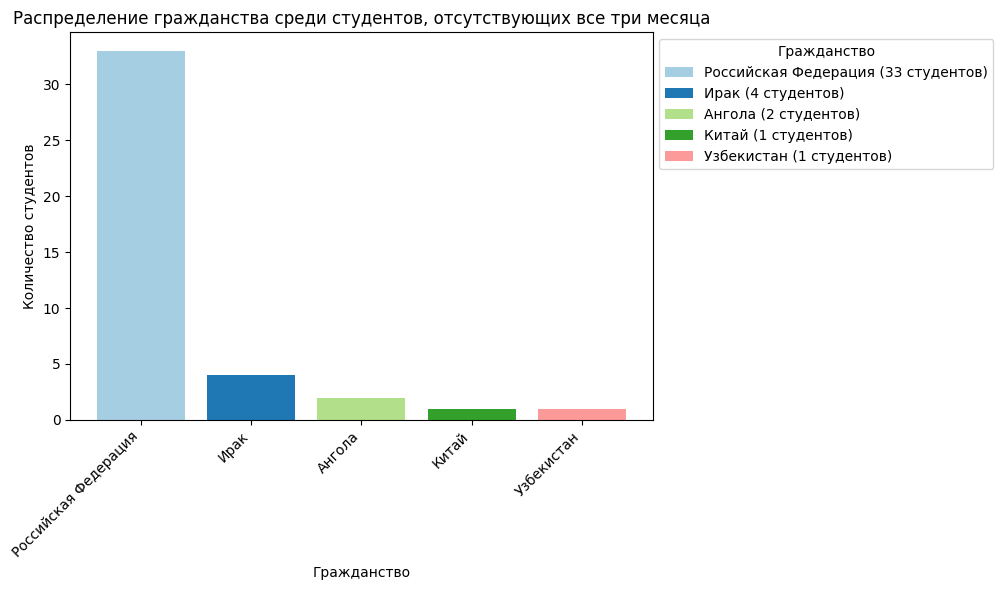

In [30]:
citizenship_counts_three_months = all_three_months_df['citizenship'].value_counts()
plt.figure(figsize=(10, 6))  
bars = plt.bar(citizenship_counts_three_months.index, citizenship_counts_three_months, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих все три месяца")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")

plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts_three_months.index, citizenship_counts_three_months)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

## Данные по студентам второго курса

In [16]:
filtered_2_course = df_asp[df_asp['course'] == 2]
filtered_2_course.head(5)

,Unnamed: 0,tabel_number,division,specialization,course,state,citizenship,date_of_birth,start_date,end_date,discipline,mark,semester,academic_year,structural_division
15,15,2300359,Горный институт,"Геотехнология, горные машины",2,Аспирант,Российская Федерация,08.06.1997,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС
16,16,2309279,Горный институт,"Геотехнология, горные машины",2,Аспирант,Российская Федерация,04.11.1994,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС
17,17,2300304,Институт новых материалов и нанотехнологий,Технология и оборудование для производства мат...,2,Аспирант,Куба,03.10.1992,01.09.2024,30.06.2027,NaN,NaN,NaN,NaN,НИТУ МИСИС
20,20,2311726,Институт экотехнологий и инжиниринга,Металловедение и термическая обработка металло...,2,Аспирант,Российская Федерация,16.12.1995,01.09.2024,30.06.2027,NaN,NaN,NaN,NaN,НИТУ МИСИС
31,31,2315839,Горный институт,Электротехнические комплексы и системы,2,Аспирант,Нигер,14.04.1990,01.09.2024,30.06.2027,NaN,NaN,NaN,NaN,НИТУ МИСИС


In [17]:
filtered_2_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 15 to 1581
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           213 non-null    int64 
 1   tabel_number         213 non-null    int64 
 2   division             213 non-null    object
 3   specialization       213 non-null    object
 4   course               213 non-null    int64 
 5   state                213 non-null    object
 6   citizenship          213 non-null    object
 7   date_of_birth        213 non-null    object
 8   start_date           118 non-null    object
 9   end_date             118 non-null    object
 10  discipline           0 non-null      object
 11  mark                 0 non-null      object
 12  semester             0 non-null      object
 13  academic_year        0 non-null      object
 14  structural_division  201 non-null    object
dtypes: int64(3), object(12)
memory usage: 26.6+ KB


Видим, что всего 213 аспирантов 2 курса

Составляем список из уникальных номеров личного дела (tabel_number) студентов 2 курса

In [18]:
tabel_numbers_2 = filtered_2_course['tabel_number'].unique().tolist()

### Импорт таблицы посещаемости студентов 2 курса

In [19]:
event_course2 = pd.read_csv(r'C:\Users\makar\office_staff\asp_events_for_course2.csv')
event_course2

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number
0,45310769,2024-02-01 16:54:13,131072,1820464.0,12.0,2.0,65545.0,12898440.0,4458430,5325001.0,1.0,1808617.0,NaN,2024-02-01 16:54:13,NaN,NaN,2024-02-01 13:54:13,NaN,2315794
1,45310773,2024-02-01 16:54:12,17,1820464.0,0.0,2.0,0.0,12898440.0,4458430,NaN,1.0,1808617.0,NaN,2024-02-01 16:54:13,NaN,NaN,2024-02-01 13:54:12,1.0,2315794
2,45311867,2024-02-01 17:04:06,131072,2149401.0,12.0,1.0,65608.0,12898440.0,4458430,5325007.0,1.0,2155773.0,NaN,2024-02-01 17:04:06,NaN,NaN,2024-02-01 14:04:06,NaN,2315794
3,45311871,2024-02-01 17:04:06,17,2149401.0,0.0,1.0,0.0,12898440.0,4458430,NaN,1.0,2155773.0,NaN,2024-02-01 17:04:07,NaN,NaN,2024-02-01 14:04:06,1.0,2315794
4,45312033,2024-02-01 17:05:35,131072,440359.0,12.0,1.0,65601.0,12898440.0,4458430,5325008.0,171451.0,1.0,NaN,2024-02-01 17:05:35,NaN,NaN,2024-02-01 14:05:35,NaN,2315794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72219,85575802,2024-10-18 12:25:52,17,2269403.0,0.0,2.0,0.0,15752281.0,5348574,NaN,2272132.0,1.0,NaN,2024-10-18 12:25:54,NaN,NaN,2024-10-18 09:25:52,1.0,2315839
72220,85578470,2024-10-18 12:30:49,131072,1809532.0,12.0,1.0,65539.0,15752281.0,5348574,5325001.0,1808617.0,1.0,NaN,2024-10-18 12:30:49,NaN,NaN,2024-10-18 09:30:49,NaN,2315839
72221,85578476,2024-10-18 12:30:49,17,1809532.0,0.0,1.0,0.0,15752281.0,5348574,NaN,1808617.0,1.0,NaN,2024-10-18 12:30:50,NaN,NaN,2024-10-18 09:30:49,1.0,2315839
72222,85586638,2024-10-18 12:52:04,131072,4136795.0,12.0,2.0,65542.0,15752281.0,5348574,5325001.0,1808617.0,1.0,NaN,2024-10-18 12:52:04,NaN,NaN,2024-10-18 09:52:04,NaN,2315839


Всего 72224 записей по аспирантам 2 курса

In [20]:
# Добавляем столбец с датой
event_course2['time_label'] = pd.to_datetime(event_course2['time_label'])
event_course2['date'] = event_course2['time_label'].dt.date
# Фильтруем по типам событий 16, 17
event_course2 = event_course2[event_course2['event_type'].isin([16, 17])]
event_course2

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date
1,45310773,2024-02-01 16:54:12,17,1820464.0,0.0,2.0,0.0,12898440.0,4458430,NaN,1.0,1808617.0,NaN,2024-02-01 16:54:13,NaN,NaN,2024-02-01 13:54:12,1.0,2315794,2024-02-01
3,45311871,2024-02-01 17:04:06,17,2149401.0,0.0,1.0,0.0,12898440.0,4458430,NaN,1.0,2155773.0,NaN,2024-02-01 17:04:07,NaN,NaN,2024-02-01 14:04:06,1.0,2315794,2024-02-01
5,45312034,2024-02-01 17:05:36,17,440359.0,0.0,1.0,0.0,12898440.0,4458430,NaN,171451.0,1.0,NaN,2024-02-01 17:05:37,NaN,NaN,2024-02-01 14:05:36,1.0,2315794,2024-02-01
7,45314184,2024-02-01 17:27:11,17,440359.0,0.0,2.0,0.0,12898440.0,4458430,NaN,171451.0,1.0,NaN,2024-02-01 17:27:12,NaN,NaN,2024-02-01 14:27:11,1.0,2315794,2024-02-01
9,46665226,2024-02-15 18:10:59,17,4820408.0,0.0,2.0,0.0,12898440.0,4458430,NaN,1.0,9.0,NaN,2024-02-15 18:10:59,NaN,NaN,2024-02-15 15:10:59,1.0,2315794,2024-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72215,83007562,2024-09-27 17:02:06,17,5245383.0,0.0,2.0,0.0,15752281.0,5348574,NaN,1260046.0,1.0,NaN,2024-09-27 17:02:08,NaN,NaN,2024-09-27 14:02:06,1.0,2315839,2024-09-27
72217,85568198,2024-10-18 11:53:34,17,2149401.0,0.0,2.0,0.0,15752281.0,5348574,NaN,1.0,2155773.0,NaN,2024-10-18 11:53:35,NaN,NaN,2024-10-18 08:53:34,1.0,2315839,2024-10-18
72219,85575802,2024-10-18 12:25:52,17,2269403.0,0.0,2.0,0.0,15752281.0,5348574,NaN,2272132.0,1.0,NaN,2024-10-18 12:25:54,NaN,NaN,2024-10-18 09:25:52,1.0,2315839,2024-10-18
72221,85578476,2024-10-18 12:30:49,17,1809532.0,0.0,1.0,0.0,15752281.0,5348574,NaN,1808617.0,1.0,NaN,2024-10-18 12:30:50,NaN,NaN,2024-10-18 09:30:49,1.0,2315839,2024-10-18


Теперь осталось 38406 записей по студентам

Теперь соединяем таблицы с информацией по аспирантам и их посещаемостью. Добавляем столбец с гражданством в таблицу event_course2

In [21]:
# Добавляем столбец 'dormitory', который будет равен 'yes', если есть start_date и end_date
filtered_2_course['dormitory'] = filtered_2_course.apply(
    lambda row: 'Общежитие есть' if pd.notna(row['start_date']) and pd.notna(row['end_date']) else 'Нет общежития', axis=1
)
event_course2 = event_course2.drop(columns=['citizenship', 'citizenship_x', 'citizenship_y'], errors='ignore')
event_course2 = event_course2.merge(filtered_2_course[['tabel_number', 'citizenship', 'dormitory']], 
                                    on='tabel_number', 
                                    how='left')

event_course2

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,...,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date,citizenship,dormitory
0,45310773,2024-02-01 16:54:12,17,1820464.0,0.0,2.0,0.0,12898440.0,4458430,NaN,...,NaN,2024-02-01 16:54:13,NaN,NaN,2024-02-01 13:54:12,1.0,2315794,2024-02-01,Венесуэла Боливарианская Республика,Общежитие есть
1,45311871,2024-02-01 17:04:06,17,2149401.0,0.0,1.0,0.0,12898440.0,4458430,NaN,...,NaN,2024-02-01 17:04:07,NaN,NaN,2024-02-01 14:04:06,1.0,2315794,2024-02-01,Венесуэла Боливарианская Республика,Общежитие есть
2,45312034,2024-02-01 17:05:36,17,440359.0,0.0,1.0,0.0,12898440.0,4458430,NaN,...,NaN,2024-02-01 17:05:37,NaN,NaN,2024-02-01 14:05:36,1.0,2315794,2024-02-01,Венесуэла Боливарианская Республика,Общежитие есть
3,45314184,2024-02-01 17:27:11,17,440359.0,0.0,2.0,0.0,12898440.0,4458430,NaN,...,NaN,2024-02-01 17:27:12,NaN,NaN,2024-02-01 14:27:11,1.0,2315794,2024-02-01,Венесуэла Боливарианская Республика,Общежитие есть
4,46665226,2024-02-15 18:10:59,17,4820408.0,0.0,2.0,0.0,12898440.0,4458430,NaN,...,NaN,2024-02-15 18:10:59,NaN,NaN,2024-02-15 15:10:59,1.0,2315794,2024-02-15,Венесуэла Боливарианская Республика,Общежитие есть
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38401,83007562,2024-09-27 17:02:06,17,5245383.0,0.0,2.0,0.0,15752281.0,5348574,NaN,...,NaN,2024-09-27 17:02:08,NaN,NaN,2024-09-27 14:02:06,1.0,2315839,2024-09-27,Нигер,Общежитие есть
38402,85568198,2024-10-18 11:53:34,17,2149401.0,0.0,2.0,0.0,15752281.0,5348574,NaN,...,NaN,2024-10-18 11:53:35,NaN,NaN,2024-10-18 08:53:34,1.0,2315839,2024-10-18,Нигер,Общежитие есть
38403,85575802,2024-10-18 12:25:52,17,2269403.0,0.0,2.0,0.0,15752281.0,5348574,NaN,...,NaN,2024-10-18 12:25:54,NaN,NaN,2024-10-18 09:25:52,1.0,2315839,2024-10-18,Нигер,Общежитие есть
38404,85578476,2024-10-18 12:30:49,17,1809532.0,0.0,1.0,0.0,15752281.0,5348574,NaN,...,NaN,2024-10-18 12:30:50,NaN,NaN,2024-10-18 09:30:49,1.0,2315839,2024-10-18,Нигер,Общежитие есть


## Определим тех, кто не ходит в ВУЗ

Сначала определим период, котрый доступен нам по второкурсникам

In [22]:
event_course2['date'] = pd.to_datetime(event_course2['date'])
earliest_date = event_course2['date'].min()
latest_date = event_course2['date'].max()

print("Самая ранняя дата:", earliest_date)
print("Самая поздняя дата:", latest_date)

Самая ранняя дата: 2024-01-28 00:00:00
Самая поздняя дата: 2024-11-10 00:00:00


В нашей базе данных для второкурсников доступен период с конца января по ноябрь 2024 года. Рассмотрим посещаемость в этот период. Январь не будем рассматривать, поскольку нам не доступна большая часть информации по нему

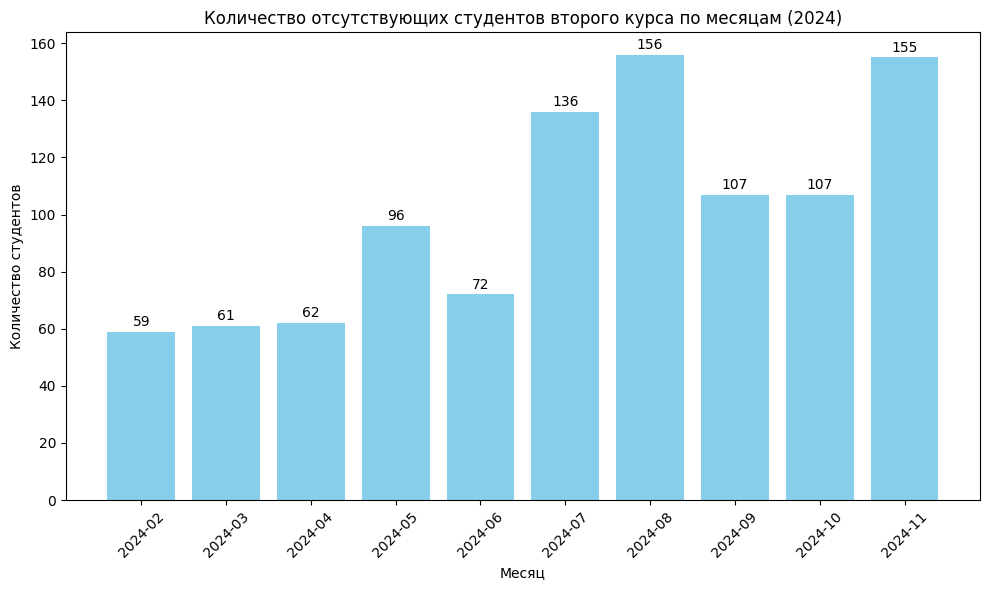

In [23]:
events_course2_filtered = event_course2[(event_course2['date'] >= '2024-01-01') & (event_course2['date'] <= '2024-11-10')]
events_course2_filtered['month'] = events_course2_filtered['date'].dt.to_period('M')
months_to_check = ['2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']
absent_students_by_month = []

for month in months_to_check:
    events_in_month = events_course2_filtered[events_course2_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = filtered_2_course.loc[~filtered_2_course['tabel_number'].isin(present_tabel_numbers)]

    absent_students_by_month.append({
        'Месяц': month,
        'Количество отсутствующих студентов': absent_tabel_numbers.shape[0]
    })

absent_students_df = pd.DataFrame(absent_students_by_month)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
bars = plt.bar(absent_students_df['Месяц'], absent_students_df['Количество отсутствующих студентов'], color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество студентов')
plt.title('Количество отсутствующих студентов второго курса по месяцам (2024)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [24]:
absent_students_df

,Месяц,Количество отсутствующих студентов
0,2024-02,59
1,2024-03,61
2,2024-04,62
3,2024-05,96
4,2024-06,72
5,2024-07,136
6,2024-08,156
7,2024-09,107
8,2024-10,107
9,2024-11,155


Выводим таблицу по самим отсутствующим студентам

In [34]:
absent_students_full_df = pd.DataFrame(columns=['tabel_number', 'citizenship', 'месяц отсутствия'])
months_to_check = {'2024-02': 'февраль', '2024-03': 'март', '2024-04': 'апрель', '2024-05': 'май', '2024-06': 'июнь', '2024-07': 'июль', '2024-08': 'август', '2024-09': 'сентябрь', '2024-10': 'октябрь', '2024-11': 'ноябрь'}

for month in months_to_check.keys():
    events_in_month = events_course2_filtered[events_course2_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_students = filtered_2_course.loc[
        (~filtered_2_course['tabel_number'].isin(present_tabel_numbers)) &
        (filtered_2_course['citizenship'] != "Российская Федерация")
    ]
    
    absent_students['месяц отсутствия'] = month 
    absent_students_full_df = pd.concat([absent_students_full_df, absent_students[['tabel_number', 'citizenship', 'месяц отсутствия', 'dormitory']]], ignore_index=True)

absent_students_full_df

,tabel_number,citizenship,месяц отсутствия,dormitory
0,2316653,Ирак,2024-02,Общежитие есть
1,2315265,Нидерланды,2024-02,Общежитие есть
2,2309121,Казахстан,2024-02,Общежитие есть
3,2315393,Алжир,2024-02,Общежитие есть
4,2315543,Ирак,2024-02,Общежитие есть
...,...,...,...,...
119,2315529,Ангола,2024-11,Общежитие есть
120,2300396,Казахстан,2024-11,Общежитие есть
121,2303475,Сирийская Арабская Республика,2024-11,Общежитие есть
122,2315450,Кот Д'ивуар,2024-11,Общежитие есть


In [30]:
unique_student_count = absent_students_full_df['tabel_number'].nunique()
print(f'Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: {unique_student_count} человек из 213 второкурсников')

Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: 185 человек из 213 второкурсников


Найдем количество студентов, отсутствующих 1 месяц, 2, 3 и т.д.

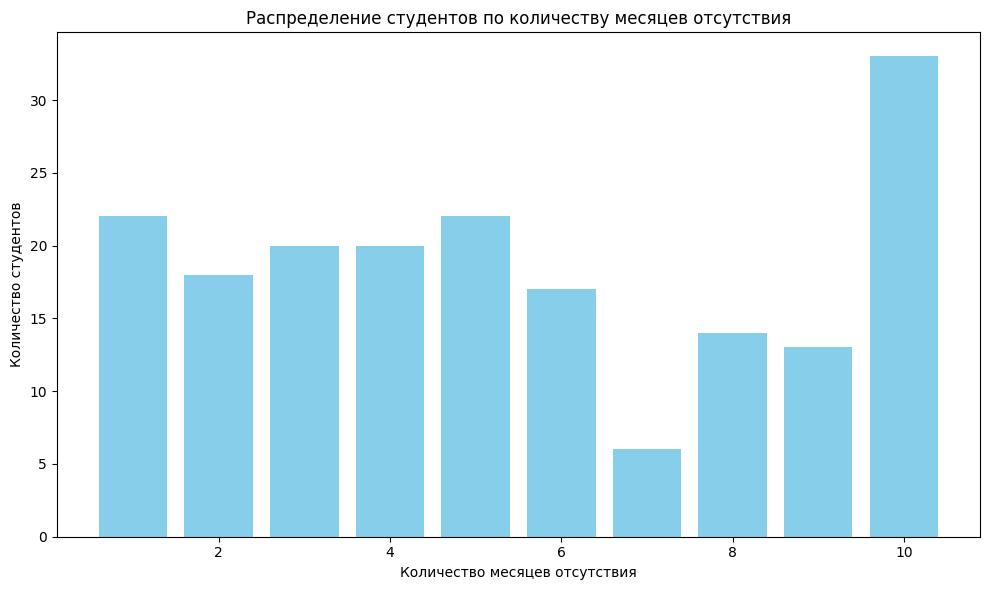

In [31]:
student_absence_count = absent_students_full_df.groupby('tabel_number')['месяц отсутствия'].nunique()
absence_counts = student_absence_count.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(absence_counts.index, absence_counts.values, color='skyblue')
plt.xlabel('Количество месяцев отсутствия')
plt.ylabel('Количество студентов')
plt.title('Распределение студентов по количеству месяцев отсутствия')

plt.tight_layout()
plt.show()


In [32]:
absence_counts

месяц отсутствия
1     22
2     18
3     20
4     20
5     22
6     17
7      6
8     14
9     13
10    33
Name: count, dtype: int64

Теперь посмотрим на студентов, которые отсутствовали все 10 месяцев (ни разу не ходили за этот период обучения)

In [33]:
students_all_absent = student_absence_count[student_absence_count == 10]
tabel_numbers_all_absent = students_all_absent.index

all_absent_students_df = absent_students_full_df[
    (absent_students_full_df['tabel_number'].isin(tabel_numbers_all_absent)) &
    (absent_students_full_df['citizenship'] != "Российская Федерация")
]
citizenship_info = all_absent_students_df[['tabel_number', 'citizenship', 'dormitory']].drop_duplicates()

citizenship_counts = citizenship_info['citizenship'].value_counts()
citizenship_info

,tabel_number,citizenship,dormitory
6,2315265,Нидерланды,Общежитие есть
18,2315393,Алжир,Общежитие есть
38,2311165,Узбекистан,Нет общежития


График распределения гражданства отсутствующих 10 месяцев

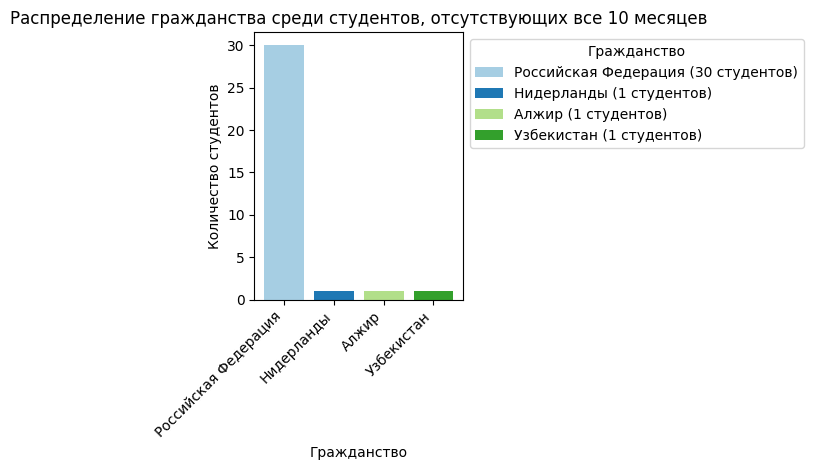

In [45]:
bars = plt.bar(citizenship_counts.index, citizenship_counts, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих все 10 месяцев")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")
plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts.index, citizenship_counts)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Данные по студентам третьего курса

In [36]:
filtered_3_course = df_asp[df_asp['course'] == 3]
filtered_3_course.head(5)

,Unnamed: 0,tabel_number,division,specialization,course,state,citizenship,date_of_birth,start_date,end_date,discipline,mark,semester,academic_year,structural_division
0,0,2200674,Горный институт,Электротехнические комплексы и системы,3,Аспирант,Ирак,11.05.1981,01.09.2024,31.08.2026,NaN,NaN,NaN,NaN,NaN
9,9,2210009,Институт экотехнологий и инжиниринга,Обработка металлов давлением,3,Аспирант,Узбекистан,26.09.1994,01.09.2024,30.06.2026,NaN,NaN,NaN,NaN,НИТУ МИСИС
19,19,1900103,Горный институт,"Геотехнология, горные машины",3,Аспирант,Российская Федерация,22.08.1994,01.09.2019,31.05.2021,NaN,NaN,NaN,NaN,НИТУ МИСИС
21,21,2210036,Институт новых материалов и нанотехнологий,Металловедение и термическая обработка металло...,3,Аспирант,Российская Федерация,23.03.1998,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС
32,32,2213201,Горный институт,Экологическая безопасность,3,Аспирант,Ирак,30.08.1987,NaN,NaN,NaN,NaN,NaN,NaN,НИТУ МИСИС


In [37]:
filtered_3_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           169 non-null    int64 
 1   tabel_number         169 non-null    int64 
 2   division             169 non-null    object
 3   specialization       169 non-null    object
 4   course               169 non-null    int64 
 5   state                169 non-null    object
 6   citizenship          169 non-null    object
 7   date_of_birth        169 non-null    object
 8   start_date           114 non-null    object
 9   end_date             114 non-null    object
 10  discipline           0 non-null      object
 11  mark                 0 non-null      object
 12  semester             0 non-null      object
 13  academic_year        0 non-null      object
 14  structural_division  113 non-null    object
dtypes: int64(3), object(12)
memory usage: 21.1+ KB


Видим, что всего 169 аспирантов 3 курса

Составляем список из уникальных номеров личного дела (tabel_number) студентов 3 курса

In [38]:
tabel_numbers_3 = filtered_3_course['tabel_number'].unique().tolist()

### Импорт таблицы посещаемости студентов 3 курса

In [39]:
event_course3 = pd.read_csv(r'C:\Users\makar\office_staff\asp_events_for_course3.csv')
event_course3

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number
0,47401237,2024-02-24 10:49:30,501402,NaN,NaN,NaN,NaN,NaN,4213193,1.0,NaN,NaN,"{""newData"":{""access_template"":""Сотрудник МИСИС...",2024-02-24 10:49:30,NaN,NaN,NaN,NaN,2106286
1,52642830,2024-04-02 16:03:16,131072,4820408.0,12.0,2.0,65555.0,3236908.0,4213193,5324998.0,1.0,9.0,NaN,2024-04-02 16:03:16,NaN,NaN,2024-04-02 13:03:16,NaN,2106286
2,52642839,2024-04-02 16:03:17,17,4820408.0,0.0,2.0,0.0,3236908.0,4213193,NaN,1.0,9.0,NaN,2024-04-02 16:03:17,NaN,NaN,2024-04-02 13:03:17,1.0,2106286
3,52647569,2024-04-02 16:15:58,131072,4820408.0,12.0,1.0,65556.0,3236908.0,4213193,5324998.0,1.0,9.0,NaN,2024-04-02 16:15:58,NaN,NaN,2024-04-02 13:15:58,NaN,2106286
4,52647576,2024-04-02 16:15:59,17,4820408.0,0.0,1.0,0.0,3236908.0,4213193,NaN,1.0,9.0,NaN,2024-04-02 16:16:00,NaN,NaN,2024-04-02 13:15:59,1.0,2106286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49269,80894235,2024-09-10 12:18:26,17,3140901.0,0.0,2.0,0.0,15063536.0,5354193,NaN,3147273.0,1.0,NaN,2024-09-10 12:18:59,NaN,NaN,2024-09-10 09:18:26,1.0,2316634
49270,80898763,2024-09-10 12:25:26,131072,2145761.0,12.0,1.0,65609.0,15063536.0,5354193,5325007.0,2155773.0,1.0,NaN,2024-09-10 12:25:26,NaN,NaN,2024-09-10 09:25:26,NaN,2316634
49271,80898792,2024-09-10 12:24:54,17,2145761.0,0.0,1.0,0.0,15063536.0,5354193,NaN,2155773.0,1.0,NaN,2024-09-10 12:25:28,NaN,NaN,2024-09-10 09:24:54,1.0,2316634
49272,80910395,2024-09-10 12:41:12,131072,2153041.0,12.0,1.0,65603.0,15063536.0,5354193,5325007.0,1.0,2155773.0,NaN,2024-09-10 12:41:14,NaN,NaN,2024-09-10 09:41:12,NaN,2316634


Всего 49274 записей по аспирантам 3 курса

In [40]:
# Добавляем столбец с датой
event_course3['time_label'] = pd.to_datetime(event_course3['time_label'])
event_course3['date'] = event_course3['time_label'].dt.date
# Фильтруем по типам событий 16, 17
event_course3 = event_course3[event_course3['event_type'].isin([16, 17])]
event_course3

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date
2,52642839,2024-04-02 16:03:17,17,4820408.0,0.0,2.0,0.0,3236908.0,4213193,NaN,1.0,9.0,NaN,2024-04-02 16:03:17,NaN,NaN,2024-04-02 13:03:17,1.0,2106286,2024-04-02
4,52647576,2024-04-02 16:15:59,17,4820408.0,0.0,1.0,0.0,3236908.0,4213193,NaN,1.0,9.0,NaN,2024-04-02 16:16:00,NaN,NaN,2024-04-02 13:15:59,1.0,2106286,2024-04-02
6,52648865,2024-04-02 16:19:25,17,2149401.0,0.0,2.0,0.0,3236908.0,4213193,NaN,1.0,2155773.0,NaN,2024-04-02 16:19:26,NaN,NaN,2024-04-02 13:19:25,1.0,2106286,2024-04-02
8,52650614,2024-04-02 16:26:28,17,2153041.0,0.0,1.0,0.0,3236908.0,4213193,NaN,1.0,2155773.0,NaN,2024-04-02 16:26:29,NaN,NaN,2024-04-02 13:26:28,1.0,2106286,2024-04-02
10,52755818,2024-04-03 12:58:10,17,2149401.0,0.0,2.0,0.0,3236908.0,4213193,NaN,1.0,2155773.0,NaN,2024-04-03 12:58:11,NaN,NaN,2024-04-03 09:58:10,1.0,2106286,2024-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49265,74996329,2024-08-15 16:07:38,17,3140901.0,0.0,2.0,0.0,15063536.0,5354193,NaN,3147273.0,1.0,NaN,2024-08-15 16:07:39,NaN,NaN,2024-08-15 13:07:38,1.0,2316634,2024-08-15
49267,80887549,2024-09-10 11:46:19,17,3140901.0,0.0,1.0,0.0,15063536.0,5354193,NaN,3147273.0,1.0,NaN,2024-09-10 11:46:46,NaN,NaN,2024-09-10 08:46:19,1.0,2316634,2024-09-10
49269,80894235,2024-09-10 12:18:26,17,3140901.0,0.0,2.0,0.0,15063536.0,5354193,NaN,3147273.0,1.0,NaN,2024-09-10 12:18:59,NaN,NaN,2024-09-10 09:18:26,1.0,2316634,2024-09-10
49271,80898792,2024-09-10 12:24:54,17,2145761.0,0.0,1.0,0.0,15063536.0,5354193,NaN,2155773.0,1.0,NaN,2024-09-10 12:25:28,NaN,NaN,2024-09-10 09:24:54,1.0,2316634,2024-09-10


Теперь осталось 28362 записей по студентам

Теперь соединяем таблицы с информацией по аспирантам и их посещаемостью. Добавляем столбец с гражданством в таблицу event_course3

In [41]:
# Добавляем столбец 'dormitory', который будет равен 'yes', если есть start_date и end_date
filtered_3_course['dormitory'] = filtered_3_course.apply(
    lambda row: 'Общежитие есть' if pd.notna(row['start_date']) and pd.notna(row['end_date']) else 'Нет общежития', axis=1
)
event_course3 = event_course3.drop(columns=['citizenship', 'citizenship_x', 'citizenship_y','dormitory', 'dormitory_x', 'dormitory_y'], errors='ignore')
event_course3 = event_course3.merge(filtered_3_course[['tabel_number', 'citizenship', 'dormitory']], 
                                    on='tabel_number', 
                                    how='left')

event_course3

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,...,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date,citizenship,dormitory
0,52642839,2024-04-02 16:03:17,17,4820408.0,0.0,2.0,0.0,3236908.0,4213193,NaN,...,NaN,2024-04-02 16:03:17,NaN,NaN,2024-04-02 13:03:17,1.0,2106286,2024-04-02,Российская Федерация,Общежитие есть
1,52647576,2024-04-02 16:15:59,17,4820408.0,0.0,1.0,0.0,3236908.0,4213193,NaN,...,NaN,2024-04-02 16:16:00,NaN,NaN,2024-04-02 13:15:59,1.0,2106286,2024-04-02,Российская Федерация,Общежитие есть
2,52648865,2024-04-02 16:19:25,17,2149401.0,0.0,2.0,0.0,3236908.0,4213193,NaN,...,NaN,2024-04-02 16:19:26,NaN,NaN,2024-04-02 13:19:25,1.0,2106286,2024-04-02,Российская Федерация,Общежитие есть
3,52650614,2024-04-02 16:26:28,17,2153041.0,0.0,1.0,0.0,3236908.0,4213193,NaN,...,NaN,2024-04-02 16:26:29,NaN,NaN,2024-04-02 13:26:28,1.0,2106286,2024-04-02,Российская Федерация,Общежитие есть
4,52755818,2024-04-03 12:58:10,17,2149401.0,0.0,2.0,0.0,3236908.0,4213193,NaN,...,NaN,2024-04-03 12:58:11,NaN,NaN,2024-04-03 09:58:10,1.0,2106286,2024-04-03,Российская Федерация,Общежитие есть
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,74996329,2024-08-15 16:07:38,17,3140901.0,0.0,2.0,0.0,15063536.0,5354193,NaN,...,NaN,2024-08-15 16:07:39,NaN,NaN,2024-08-15 13:07:38,1.0,2316634,2024-08-15,Российская Федерация,Нет общежития
28358,80887549,2024-09-10 11:46:19,17,3140901.0,0.0,1.0,0.0,15063536.0,5354193,NaN,...,NaN,2024-09-10 11:46:46,NaN,NaN,2024-09-10 08:46:19,1.0,2316634,2024-09-10,Российская Федерация,Нет общежития
28359,80894235,2024-09-10 12:18:26,17,3140901.0,0.0,2.0,0.0,15063536.0,5354193,NaN,...,NaN,2024-09-10 12:18:59,NaN,NaN,2024-09-10 09:18:26,1.0,2316634,2024-09-10,Российская Федерация,Нет общежития
28360,80898792,2024-09-10 12:24:54,17,2145761.0,0.0,1.0,0.0,15063536.0,5354193,NaN,...,NaN,2024-09-10 12:25:28,NaN,NaN,2024-09-10 09:24:54,1.0,2316634,2024-09-10,Российская Федерация,Нет общежития


## Определим тех, кто не ходит в ВУЗ

Сначала определим период, который доступен нам по третьекурсникам

In [42]:
event_course3['date'] = pd.to_datetime(event_course3['date'])
earliest_date = event_course3['date'].min()
latest_date = event_course3['date'].max()

print("Самая ранняя дата:", earliest_date)
print("Самая поздняя дата:", latest_date)

Самая ранняя дата: 2024-01-29 00:00:00
Самая поздняя дата: 2024-11-10 00:00:00


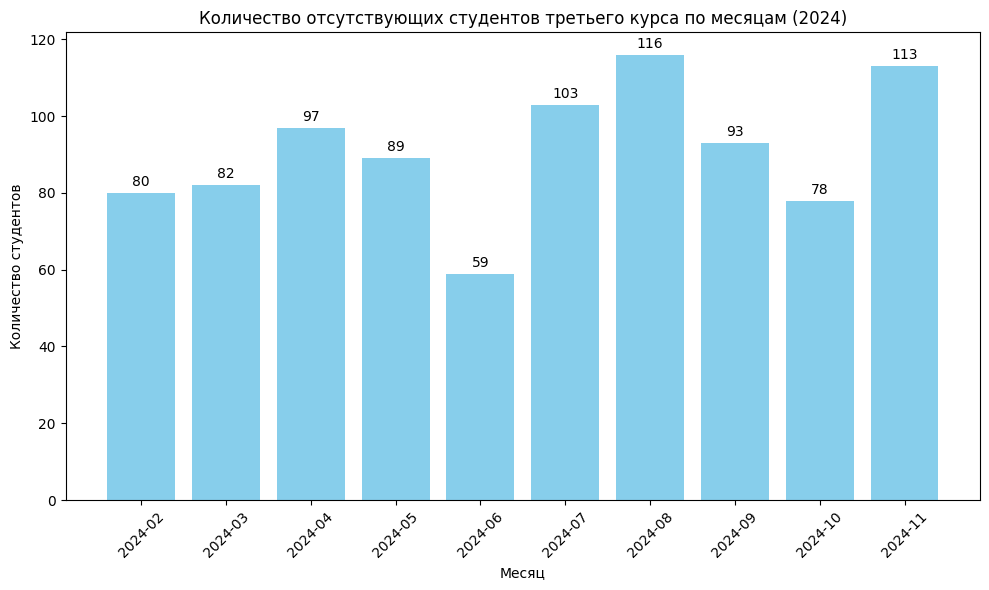

In [43]:
event_course3['time_label'] = pd.to_datetime(event_course3['time_label'])
event_course3['date'] = event_course3['time_label'].dt.date 
event_course3['date'] = pd.to_datetime(event_course3['date'])

start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-11-10')

events_course3_filtered = event_course3[(event_course3['date'] >= start_date) & (event_course3['date'] <= end_date)]

events_course3_filtered['month'] = events_course3_filtered['date'].dt.to_period('M')

months_to_check = ['2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']
absent_students_by_month = []
for month in months_to_check:
    events_in_month = events_course3_filtered[events_course3_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = filtered_3_course.loc[~filtered_3_course['tabel_number'].isin(present_tabel_numbers)]

    absent_students_by_month.append({
        'Месяц': month,
        'Количество отсутствующих студентов': absent_tabel_numbers.shape[0]
    })

absent_students_df = pd.DataFrame(absent_students_by_month)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
bars = plt.bar(absent_students_df['Месяц'], absent_students_df['Количество отсутствующих студентов'], color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество студентов')
plt.title('Количество отсутствующих студентов третьего курса по месяцам (2024)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [44]:
absent_students_df

,Месяц,Количество отсутствующих студентов
0,2024-02,80
1,2024-03,82
2,2024-04,97
3,2024-05,89
4,2024-06,59
5,2024-07,103
6,2024-08,116
7,2024-09,93
8,2024-10,78
9,2024-11,113


Выводим таблицу по самим отсутствующим студентам

In [51]:
absent_students_full_df_3 = pd.DataFrame(columns=['tabel_number', 'citizenship', 'месяц отсутствия'])
months_to_check = {'2024-02': 'февраль', '2024-03': 'март', '2024-04': 'апрель', '2024-05': 'май', '2024-06': 'июнь', '2024-07': 'июль', '2024-08': 'август', '2024-09': 'сентябрь', '2024-10': 'октябрь', '2024-11': 'ноябрь'}

for month in months_to_check.keys():
    events_in_month = events_course3_filtered[events_course3_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_students = filtered_3_course.loc[
        (~filtered_3_course['tabel_number'].isin(present_tabel_numbers)) &
        (filtered_3_course['citizenship'] != "Российская Федерация")
    ]
    
    absent_students['месяц отсутствия'] = month 
    absent_students_full_df_3 = pd.concat([absent_students_full_df_3, absent_students[['tabel_number', 'citizenship', 'месяц отсутствия', 'dormitory']]], ignore_index=True)

absent_students_full_df_3

,tabel_number,citizenship,месяц отсутствия,dormitory
0,2213201,Ирак,2024-02,Нет общежития
1,2212759,Бурунди,2024-02,Общежитие есть
2,2205882,Казахстан,2024-02,Общежитие есть
3,2201019,Таджикистан,2024-02,Общежитие есть
4,2213619,Бурунди,2024-02,Общежитие есть
...,...,...,...,...
77,2213202,Эквадор,2024-11,Общежитие есть
78,2213108,Ангола,2024-11,Общежитие есть
79,2213619,Бурунди,2024-11,Общежитие есть
80,2202974,Казахстан,2024-11,Общежитие есть


In [46]:
unique_student_count = absent_students_full_df_3['tabel_number'].nunique()
print(f'Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: {unique_student_count} человека из 169 третьекурсников')

Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: 143 человека из 169 третьекурсников


Найдем количество студентов, отсутствующих 1 месяц, 2, 3 и т.д.

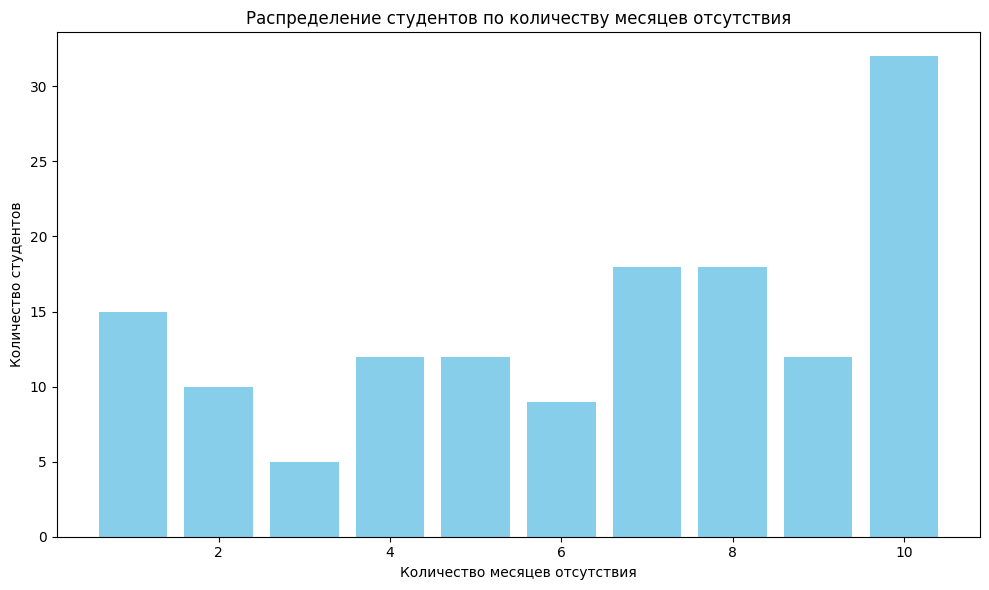

In [47]:
student_absence_count_3 = absent_students_full_df_3.groupby('tabel_number')['месяц отсутствия'].nunique()
absence_counts_3 = student_absence_count_3.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(absence_counts_3.index, absence_counts_3.values, color='skyblue')
plt.xlabel('Количество месяцев отсутствия')
plt.ylabel('Количество студентов')
plt.title('Распределение студентов по количеству месяцев отсутствия')

plt.tight_layout()
plt.show()

In [48]:
absence_counts_3

месяц отсутствия
1     15
2     10
3      5
4     12
5     12
6      9
7     18
8     18
9     12
10    32
Name: count, dtype: int64

In [50]:
students_all_absent_3 = student_absence_count_3[student_absence_count_3 == 10]
tabel_numbers_all_absent = students_all_absent_3.index

all_absent_students_df_3 = absent_students_full_df_3[
    (absent_students_full_df_3['tabel_number'].isin(tabel_numbers_all_absent)) &
    (absent_students_full_df_3['citizenship'] != "Российская Федерация")
]
citizenship_info = all_absent_students_df_3[['tabel_number', 'citizenship', 'dormitory']].drop_duplicates()

citizenship_counts = citizenship_info['citizenship'].value_counts()
citizenship_info

,tabel_number,citizenship,dormitory
1,2213201,Ирак,Нет общежития
44,2213619,Бурунди,Общежитие есть


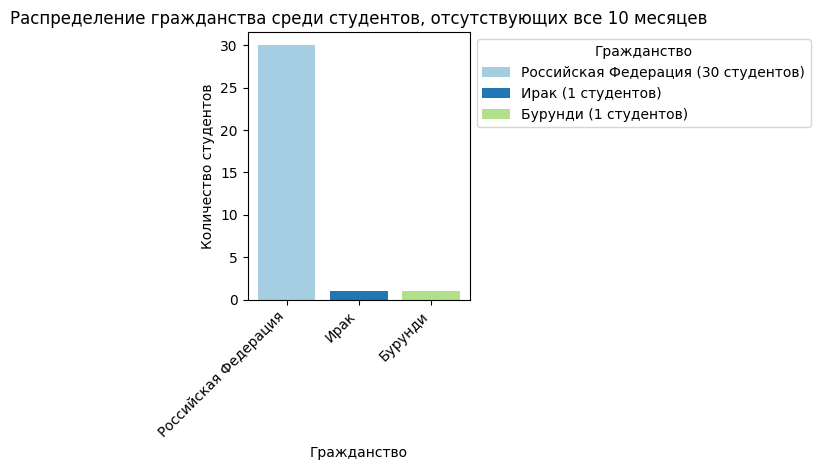

In [104]:
bars = plt.bar(citizenship_counts.index, citizenship_counts, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих все 10 месяцев")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")
plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts.index, citizenship_counts)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Данные по студентам четвертого курса

In [52]:
filtered_4_course = df_asp[df_asp['course'] == 4]
filtered_4_course.head(5)

,Unnamed: 0,tabel_number,division,specialization,course,state,citizenship,date_of_birth,start_date,end_date,discipline,mark,semester,academic_year,structural_division
1,1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Cвойства наносистем,зачтено,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
2,2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Иностранный язык,Хорошо,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
3,3,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,История и философия науки,Отлично,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
4,4,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Научно-исследовательская деятельность и подгот...,Отлично,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
5,5,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Педагогика высшей школы,Отлично,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий


In [53]:
filtered_4_course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 1 to 1577
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           952 non-null    int64 
 1   tabel_number         952 non-null    int64 
 2   division             952 non-null    object
 3   specialization       952 non-null    object
 4   course               952 non-null    int64 
 5   state                952 non-null    object
 6   citizenship          952 non-null    object
 7   date_of_birth        952 non-null    object
 8   start_date           723 non-null    object
 9   end_date             723 non-null    object
 10  discipline           951 non-null    object
 11  mark                 937 non-null    object
 12  semester             951 non-null    object
 13  academic_year        951 non-null    object
 14  structural_division  407 non-null    object
dtypes: int64(3), object(12)
memory usage: 119.0+ KB


Составляем список из уникальных номеров личного дела (tabel_number) студентов 4 курса

In [54]:
tabel_numbers_4 = filtered_4_course['tabel_number'].unique().tolist()

### Импорт таблицы посещаемости студентов 4 курса

In [55]:
event_course4 = pd.read_csv(r'C:\Users\makar\office_staff\asp_events_for_course4.csv')
event_course4

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number
0,66723263,2024-06-21 14:45:43,131072,4034688.0,12.0,2.0,65547.0,8691096.0,307706,5325001.0,1.0,1808617.0,NaN,2024-06-21 14:45:43,NaN,NaN,2024-06-21 11:45:43,NaN,2112676
1,66723267,2024-06-21 14:45:44,17,4034688.0,0.0,2.0,0.0,8691096.0,307706,NaN,1.0,1808617.0,NaN,2024-06-21 14:45:45,NaN,NaN,2024-06-21 11:45:44,1.0,2112676
2,66735878,2024-06-21 16:21:21,17,4034688.0,0.0,1.0,0.0,8691096.0,307706,NaN,1.0,1808617.0,NaN,2024-06-21 16:21:22,NaN,NaN,2024-06-21 13:21:21,1.0,2112676
3,66736431,2024-06-21 16:26:15,131072,1182111.0,12.0,2.0,65606.0,8691096.0,307706,5325008.0,1.0,171451.0,NaN,2024-06-21 16:26:15,NaN,NaN,2024-06-21 13:26:15,NaN,2112676
4,66736438,2024-06-21 16:26:17,17,1182111.0,0.0,2.0,0.0,8691096.0,307706,NaN,1.0,171451.0,NaN,2024-06-21 16:26:17,NaN,NaN,2024-06-21 13:26:17,1.0,2112676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54657,85036997,2024-10-15 11:34:03,17,1820464.0,0.0,1.0,0.0,10712657.0,5410110,NaN,1.0,1808617.0,NaN,2024-10-15 11:34:03,NaN,NaN,2024-10-15 08:34:03,1.0,1600113
54658,85037517,2024-10-15 11:38:23,131072,440359.0,12.0,1.0,65601.0,10712657.0,5410110,5325008.0,171451.0,1.0,NaN,2024-10-15 11:38:23,NaN,NaN,2024-10-15 08:38:23,NaN,1600113
54659,85037518,2024-10-15 11:38:19,17,440359.0,0.0,1.0,0.0,10712657.0,5410110,NaN,171451.0,1.0,NaN,2024-10-15 11:38:24,NaN,NaN,2024-10-15 08:38:19,1.0,1600113
54660,85043269,2024-10-15 12:15:35,131072,1182111.0,12.0,1.0,65605.0,10712657.0,5410110,5325008.0,1.0,171451.0,NaN,2024-10-15 12:15:40,NaN,NaN,2024-10-15 09:15:35,NaN,1600113


Всего 54662 записей по аспирантам 4 курса

In [56]:
# Добавляем столбец с датой
event_course4['time_label'] = pd.to_datetime(event_course4['time_label'])
event_course4['date'] = event_course4['time_label'].dt.date
# Фильтруем по типам событий 16, 17
event_course4 = event_course4[event_course4['event_type'].isin([16, 17])]
event_course4

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,access_zone_id1,access_zone_id2,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date
1,66723267,2024-06-21 14:45:44,17,4034688.0,0.0,2.0,0.0,8691096.0,307706,NaN,1.0,1808617.0,NaN,2024-06-21 14:45:45,NaN,NaN,2024-06-21 11:45:44,1.0,2112676,2024-06-21
2,66735878,2024-06-21 16:21:21,17,4034688.0,0.0,1.0,0.0,8691096.0,307706,NaN,1.0,1808617.0,NaN,2024-06-21 16:21:22,NaN,NaN,2024-06-21 13:21:21,1.0,2112676,2024-06-21
4,66736438,2024-06-21 16:26:17,17,1182111.0,0.0,2.0,0.0,8691096.0,307706,NaN,1.0,171451.0,NaN,2024-06-21 16:26:17,NaN,NaN,2024-06-21 13:26:17,1.0,2112676,2024-06-21
6,66744136,2024-06-21 17:48:09,17,440359.0,0.0,2.0,0.0,8691096.0,307706,NaN,171451.0,1.0,NaN,2024-06-21 17:48:10,NaN,NaN,2024-06-21 14:48:09,1.0,2112676,2024-06-21
8,66832042,2024-06-24 14:43:22,17,4034688.0,0.0,2.0,0.0,8691096.0,307706,NaN,1.0,1808617.0,NaN,2024-06-24 14:43:23,NaN,NaN,2024-06-24 11:43:22,1.0,2112676,2024-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54649,87250681,2024-11-02 16:39:15,17,1182111.0,0.0,1.0,0.0,11467812.0,4541804,NaN,1.0,171451.0,NaN,2024-11-02 16:39:16,NaN,NaN,2024-11-02 13:39:15,1.0,2200321,2024-11-02
54655,85033416,2024-10-15 11:05:20,17,1809532.0,0.0,1.0,0.0,10712657.0,5410110,NaN,1808617.0,1.0,NaN,2024-10-15 11:05:21,NaN,NaN,2024-10-15 08:05:20,1.0,1600113,2024-10-15
54657,85036997,2024-10-15 11:34:03,17,1820464.0,0.0,1.0,0.0,10712657.0,5410110,NaN,1.0,1808617.0,NaN,2024-10-15 11:34:03,NaN,NaN,2024-10-15 08:34:03,1.0,1600113,2024-10-15
54659,85037518,2024-10-15 11:38:19,17,440359.0,0.0,1.0,0.0,10712657.0,5410110,NaN,171451.0,1.0,NaN,2024-10-15 11:38:24,NaN,NaN,2024-10-15 08:38:19,1.0,1600113,2024-10-15


Теперь осталось 29674 записей по студентам

In [57]:
# Убираем дубликаты по 'tabel_number', оставляем первую запись для каждого студента
filtered_4_course = filtered_4_course.drop_duplicates(subset=['tabel_number'], keep='first')

# Добавляем столбец 'dormitory', который будет равен 'yes', если есть start_date и end_date
filtered_4_course['dormitory'] = filtered_4_course.apply(
    lambda row: 'Общежитие есть' if pd.notna(row['start_date']) and pd.notna(row['end_date']) else 'Нет общежития', axis=1
)
event_course4 = event_course4.drop(columns=['citizenship', 'citizenship_x', 'citizenship_y','dormitory', 'dormitory_x', 'dormitory_y'], errors='ignore')
event_course4 = event_course4.merge(filtered_4_course[['tabel_number', 'citizenship', 'dormitory']], 
                                    on='tabel_number', 
                                    how='left')

event_course4

,id,time_label,event_type,device_id,resource_type,resource_number,data,identifier,user_id,operator_id,...,description,db_time_label,comment,segment_id,time_label_utc,ident_type,tabel_number,date,citizenship,dormitory
0,66723267,2024-06-21 14:45:44,17,4034688.0,0.0,2.0,0.0,8691096.0,307706,NaN,...,NaN,2024-06-21 14:45:45,NaN,NaN,2024-06-21 11:45:44,1.0,2112676,2024-06-21,Кения,Общежитие есть
1,66735878,2024-06-21 16:21:21,17,4034688.0,0.0,1.0,0.0,8691096.0,307706,NaN,...,NaN,2024-06-21 16:21:22,NaN,NaN,2024-06-21 13:21:21,1.0,2112676,2024-06-21,Кения,Общежитие есть
2,66736438,2024-06-21 16:26:17,17,1182111.0,0.0,2.0,0.0,8691096.0,307706,NaN,...,NaN,2024-06-21 16:26:17,NaN,NaN,2024-06-21 13:26:17,1.0,2112676,2024-06-21,Кения,Общежитие есть
3,66744136,2024-06-21 17:48:09,17,440359.0,0.0,2.0,0.0,8691096.0,307706,NaN,...,NaN,2024-06-21 17:48:10,NaN,NaN,2024-06-21 14:48:09,1.0,2112676,2024-06-21,Кения,Общежитие есть
4,66832042,2024-06-24 14:43:22,17,4034688.0,0.0,2.0,0.0,8691096.0,307706,NaN,...,NaN,2024-06-24 14:43:23,NaN,NaN,2024-06-24 11:43:22,1.0,2112676,2024-06-24,Кения,Общежитие есть
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29669,87250681,2024-11-02 16:39:15,17,1182111.0,0.0,1.0,0.0,11467812.0,4541804,NaN,...,NaN,2024-11-02 16:39:16,NaN,NaN,2024-11-02 13:39:15,1.0,2200321,2024-11-02,Российская Федерация,Общежитие есть
29670,85033416,2024-10-15 11:05:20,17,1809532.0,0.0,1.0,0.0,10712657.0,5410110,NaN,...,NaN,2024-10-15 11:05:21,NaN,NaN,2024-10-15 08:05:20,1.0,1600113,2024-10-15,Российская Федерация,Нет общежития
29671,85036997,2024-10-15 11:34:03,17,1820464.0,0.0,1.0,0.0,10712657.0,5410110,NaN,...,NaN,2024-10-15 11:34:03,NaN,NaN,2024-10-15 08:34:03,1.0,1600113,2024-10-15,Российская Федерация,Нет общежития
29672,85037518,2024-10-15 11:38:19,17,440359.0,0.0,1.0,0.0,10712657.0,5410110,NaN,...,NaN,2024-10-15 11:38:24,NaN,NaN,2024-10-15 08:38:19,1.0,1600113,2024-10-15,Российская Федерация,Нет общежития


## Определим тех, кто не ходит в ВУЗ

Сначала определим период, который доступен нам по четверокурсникам

In [58]:
event_course4['date'] = pd.to_datetime(event_course4['date'])
earliest_date = event_course4['date'].min()
latest_date = event_course4['date'].max()

print("Самая ранняя дата:", earliest_date)
print("Самая поздняя дата:", latest_date)

Самая ранняя дата: 2024-01-29 00:00:00
Самая поздняя дата: 2024-11-09 00:00:00


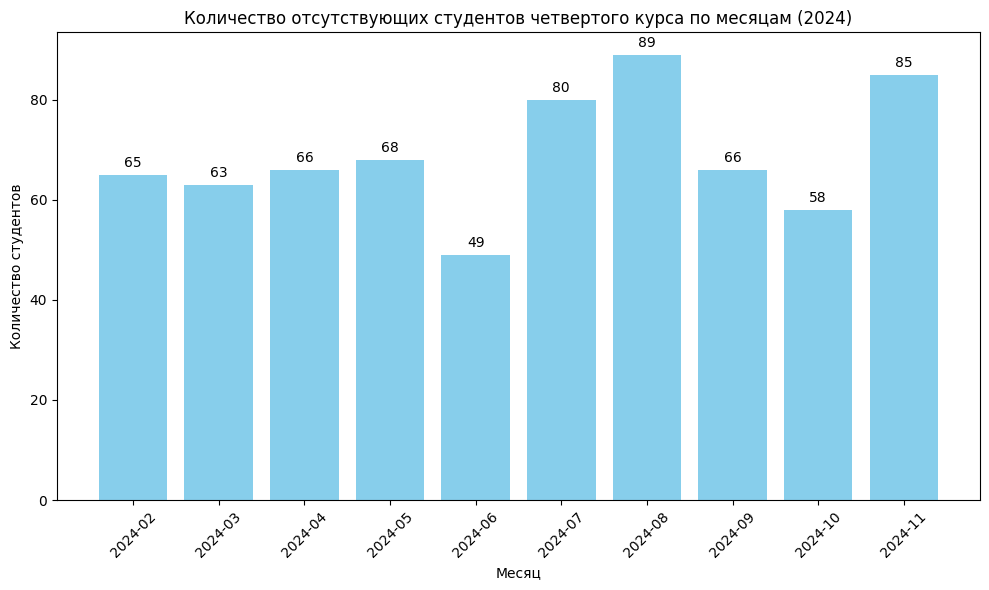

In [59]:
event_course4['time_label'] = pd.to_datetime(event_course4['time_label'])
event_course4['date'] = event_course4['time_label'].dt.date 
event_course4['date'] = pd.to_datetime(event_course4['date'])

start_date = pd.to_datetime('2024-01-29')
end_date = pd.to_datetime('2024-11-10')

events_course4_filtered = event_course4[(event_course4['date'] >= start_date) & (event_course4['date'] <= end_date)]

events_course4_filtered['month'] = events_course4_filtered['date'].dt.to_period('M')

months_to_check = ['2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']
absent_students_by_month = []
for month in months_to_check:
    events_in_month = events_course4_filtered[events_course4_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_tabel_numbers = filtered_4_course.loc[~filtered_4_course['tabel_number'].isin(present_tabel_numbers)]

    absent_students_by_month.append({
        'Месяц': month,
        'Количество отсутствующих студентов': absent_tabel_numbers.shape[0]
    })

absent_students_df = pd.DataFrame(absent_students_by_month)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
bars = plt.bar(absent_students_df['Месяц'], absent_students_df['Количество отсутствующих студентов'], color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество студентов')
plt.title('Количество отсутствующих студентов четвертого курса по месяцам (2024)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [60]:
absent_students_df

,Месяц,Количество отсутствующих студентов
0,2024-02,65
1,2024-03,63
2,2024-04,66
3,2024-05,68
4,2024-06,49
5,2024-07,80
6,2024-08,89
7,2024-09,66
8,2024-10,58
9,2024-11,85


Выводим таблицу по самим отсутствующим студентам

In [67]:
absent_students_full_df_4 = pd.DataFrame(columns=['tabel_number', 'citizenship', 'месяц отсутствия'])
months_to_check = {'2024-02': 'февраль', '2024-03': 'март', '2024-04': 'апрель', '2024-05': 'май', '2024-06': 'июнь', '2024-07': 'июль', '2024-08': 'август', '2024-09': 'сентябрь', '2024-10': 'октябрь', '2024-11': 'ноябрь'}

for month in months_to_check.keys():
    events_in_month = events_course4_filtered[events_course4_filtered['month'] == month]
    present_tabel_numbers = events_in_month['tabel_number'].unique()
    absent_students = filtered_4_course.loc[
        (~filtered_4_course['tabel_number'].isin(present_tabel_numbers)) &
        (filtered_4_course['citizenship'] != "Российская Федерация")
    ]
    
    absent_students['месяц отсутствия'] = month 
    absent_students_full_df_4 = pd.concat([absent_students_full_df_4, absent_students[['tabel_number', 'citizenship', 'месяц отсутствия', 'dormitory']]], ignore_index=True)

absent_students_full_df_4

,tabel_number,citizenship,месяц отсутствия,dormitory
0,2112756,Сирийская Арабская Республика,2024-02,Общежитие есть
1,2109393,Узбекистан,2024-02,Общежитие есть
2,2112758,Сирийская Арабская Республика,2024-02,Общежитие есть
3,2101775,Армения,2024-02,Общежитие есть
4,2112660,Армения,2024-02,Общежитие есть
...,...,...,...,...
75,2102778,Узбекистан,2024-11,Общежитие есть
76,2109412,Молдова,2024-11,Общежитие есть
77,2112339,Мьянма,2024-11,Общежитие есть
78,2103791,Казахстан,2024-11,Общежитие есть


In [62]:
unique_student_count = absent_students_full_df_4['tabel_number'].nunique()
print(f'Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: {unique_student_count} человек из 137 четверокурсников')

Всего уникальных студентов, которые отсутствовали хотя бы 1 месяц: 107 человек из 137 четверокурсников


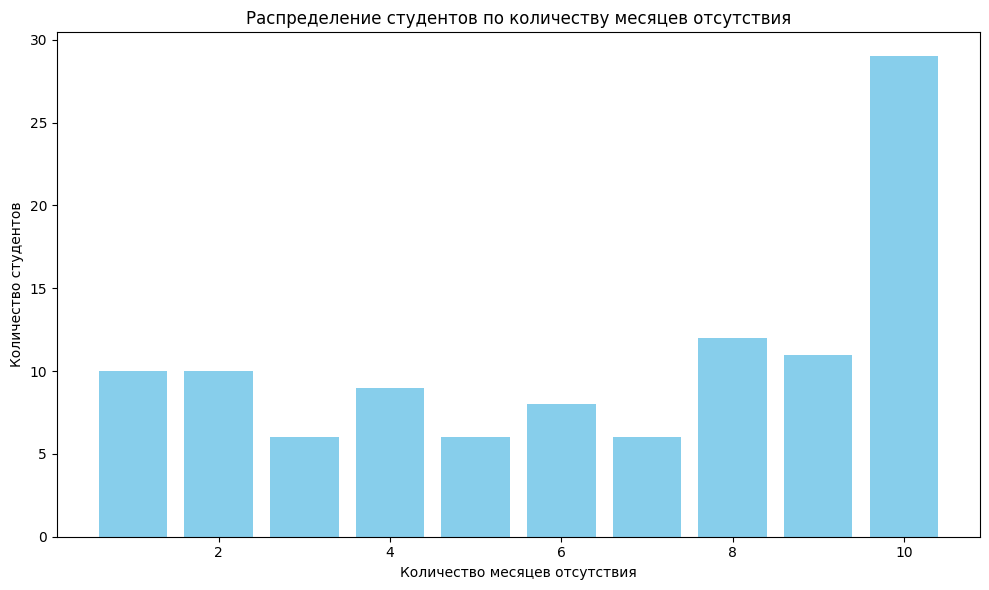

In [63]:
student_absence_count_4 = absent_students_full_df_4.groupby('tabel_number')['месяц отсутствия'].nunique()
absence_counts_4 = student_absence_count_4.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(absence_counts_4.index, absence_counts_4.values, color='skyblue')
plt.xlabel('Количество месяцев отсутствия')
plt.ylabel('Количество студентов')
plt.title('Распределение студентов по количеству месяцев отсутствия')

plt.tight_layout()
plt.show()

In [64]:
absence_counts_4

месяц отсутствия
1     10
2     10
3      6
4      9
5      6
6      8
7      6
8     12
9     11
10    29
Name: count, dtype: int64

In [66]:
students_all_absent_4 = student_absence_count_4[student_absence_count_4 == 10]
tabel_numbers_all_absent = students_all_absent_4.index

all_absent_students_df_4 = absent_students_full_df_4[
    absent_students_full_df_4['tabel_number'].isin(tabel_numbers_all_absent) &
    (absent_students_full_df_4['citizenship'] != "Российская Федерация")  
]
citizenship_info = all_absent_students_df_4[['tabel_number', 'citizenship', 'dormitory']].drop_duplicates()

citizenship_counts = citizenship_info['citizenship'].value_counts()
citizenship_info

,tabel_number,citizenship,dormitory
1,2109393,Узбекистан,Общежитие есть
38,2112660,Армения,Общежитие есть
43,2102778,Узбекистан,Общежитие есть


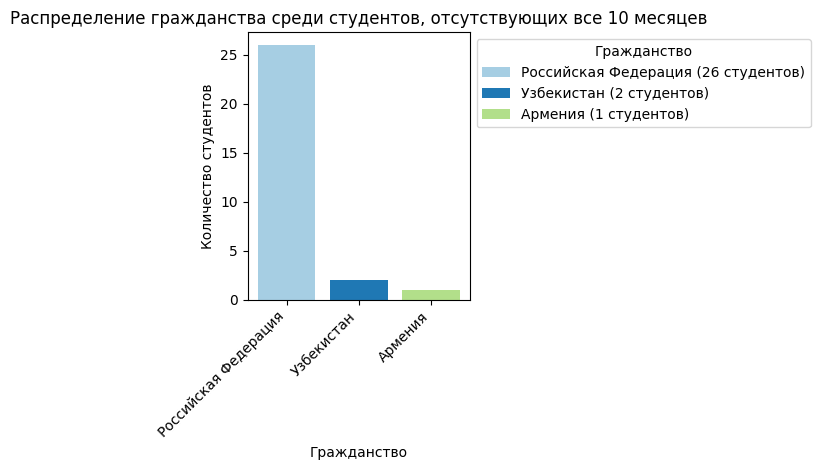

In [129]:
bars = plt.bar(citizenship_counts.index, citizenship_counts, color=plt.cm.Paired.colors)
plt.title("Распределение гражданства среди студентов, отсутствующих все 10 месяцев")
plt.xlabel("Гражданство")
plt.ylabel("Количество студентов")
plt.legend(
    bars,
    [f"{country} ({count} студентов)" for country, count in zip(citizenship_counts.index, citizenship_counts)],
    loc="upper left", 
    bbox_to_anchor=(1, 1),
    title="Гражданство"
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()